[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/tspice/blob/main/examples/love_numbers_tutorial.ipynb)

## Love numbers using `tSPICE`: Tutorial

In [ ]:
try:
    from google.colab import drive
    %pip install -Uq tspice
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2

This notebook illustrate the integration of the internal solutions of a planet with details.

In [1]:
try:
    from google.colab import drive
    %pip install -Uq tspice
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2

Not running in Colab, skipping installation


Import the required modules:

In [3]:
#Libraries
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Path to save the figures
path = './gallery/'

# Colors for the plots
colors = ['#05668d', '#39a9ee', '#006400', "#38b000", '#ff6608', '#ff914d',
          '#a4161a', '#e5383b']

## Scale parameters

In [4]:
###Scales

#Gravitational constant
G = 6.67430e-11	#m^3/kg/s^2

#Length
L = 6371e3	#m
print(f'L = {L:.2f} m')

#Mass
M = 5.972e24	#kg
print(f'M = {M:.2f} kg')

#Density
RHO = M/L**3	#kg/m^3
print(f'RHO = {RHO:.2f} kg/m^3')

#Pressure/Elasticity coefficients
P = G*M**2/L**4	#Pa
print(f'P = {P:.2e} Pa')

#Velocity
V = (P/RHO)**0.5	#m/s
print(f'V = {V:.2f} m/s')

#Time
T = L/V	#s
print(f'T = {T:.2f} s')

#Angular frecuency
OMEGA = 1/T	#rad/s
print(f'OMEGA = {OMEGA:.2e} rad/s')

#Gravity scale
Gad = G*RHO*L
print(f'Gad = {Gad:.2e} m/s^2')


L = 6371000.00 m
M = 5972000000000000327155712.00 kg
RHO = 23093.88 kg/m^3
P = 1.44e+12 Pa
V = 7909.68 m/s
T = 805.47 s
OMEGA = 1.24e-03 rad/s
Gad = 9.82e+00 m/s^2


## Planetary Model

In [6]:
from tspice.planet import Earth
earth_model = Earth()
planet_profile = earth_model.planet_profile
planet_profile

Welcome to tSPICE v0.0.2


{'rho': <numpy.vectorize at 0x11aa59040>,
 'lamb': <numpy.vectorize at 0x11aa21a90>,
 'mu': <numpy.vectorize at 0x11ad21af0>,
 'g': <scipy.interpolate._cubic.CubicSpline at 0x11ad44b30>,
 'dimensionless': False}

In [7]:
#Planetary profiles
rho_prem = lambda r: planet_profile['rho'](r)
g_prem = lambda r: planet_profile['g'](r)
lamb_prem = lambda r: planet_profile['lamb'](r)
mu_prem = lambda r: planet_profile['mu'](r)

#Main discontinuities
r_icb, r_cmb, r_repetti = 1221e3, 3.480e6, 5.701e6  #m

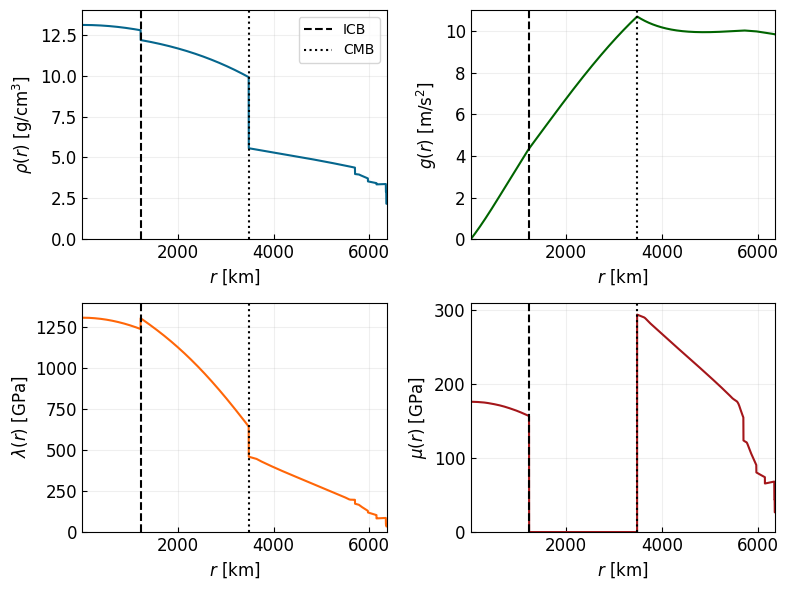

In [25]:
#Adimensional radius
rs = np.arange(1e3, 6371e3, 500)

#Plot planetary profiles
fig, axs = plt.subplots(2,2,figsize=(8,6))

ax0 = axs[0,0]
ax0.plot(rs/1e3, rho_prem(rs)/1e3, color=colors[0], ms=5)
ax0.vlines(x=r_icb/1e3, ymin=0, ymax=14000/1e3, colors='k', linestyles='dashed', label='ICB')
ax0.vlines(x=r_cmb/1e3, ymin=0, ymax=14000/1e3, colors='k', linestyles='dotted', label='CMB')
ax0.set_xlabel(r'$r$ [km]', fontsize=12)
ax0.set_ylabel(r'$\rho(r)$ [g/cm$^3$]', fontsize=12)
ax0.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax0.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax0.legend()
ax0.grid(alpha=0.2)
ax0.margins(x=0, y=0)

ax1 = axs[0,1]
ax1.plot(rs/1e3, g_prem(rs), color=colors[2], ms=5)
ax1.vlines(x=r_icb/1e3, ymin=0, ymax=11, colors='k', linestyles='dashed')
ax1.vlines(x=r_cmb/1e3, ymin=0, ymax=11, colors='k', linestyles='dotted')
ax1.set_xlabel(r'$r$ [km]', fontsize=12)
ax1.set_ylabel(r'$g(r)$ [m/s$^2$]', fontsize=12)
ax1.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax1.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax1.grid(alpha=0.2)
ax1.margins(x=0, y=0)

ax2 = axs[1,0]
ax2.plot(rs/1e3, lamb_prem(rs)/1e9, color=colors[4], ms=5)
ax2.vlines(x=r_icb/1e3, ymin=0, ymax=1400, colors='k', linestyles='dashed')
ax2.vlines(x=r_cmb/1e3, ymin=0, ymax=1400, colors='k', linestyles='dotted')
ax2.set_xlabel(r'$r$ [km]', fontsize=12)
ax2.set_ylabel(r'$\lambda(r)$ [GPa]', fontsize=12)
ax2.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax2.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax2.grid(alpha=0.2)
ax2.margins(x=0, y=0)

ax3 = axs[1,1]
ax3.plot(rs/1e3, mu_prem(rs)/1e9, color=colors[6], ms=5)
ax3.vlines(x=r_icb/1e3, ymin=0, ymax=310, colors='k', linestyles='dashed')
ax3.vlines(x=r_cmb/1e3, ymin=0, ymax=310, colors='k', linestyles='dotted')
ax3.set_xlabel(r'$r$ [km]', fontsize=12)
ax3.set_ylabel(r'$\mu(r)$ [GPa]', fontsize=12)
ax3.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax3.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
ax3.grid(alpha=0.2)
ax3.margins(x=0, y=0)

fig.tight_layout()
fig.savefig(path + 'PREM_model.png', bbox_inches='tight', dpi=300)

In [26]:
#Adimensional profiles
#Vph_prem_ad = lambda r_ad: Vph_prem(r_ad*L)/V
#Vsv_prem_ad = lambda r_ad: Vsv_prem(r_ad*L)/V
rho_prem_ad = lambda r_ad: rho_prem(r_ad*L)/RHO
g_prem_ad = lambda r_ad: g_prem(r_ad*L)/(Gad)
lamb_prem_ad = lambda r_ad: lamb_prem(r_ad*L)/P
mu_prem_ad = lambda r_ad: mu_prem(r_ad*L)/P


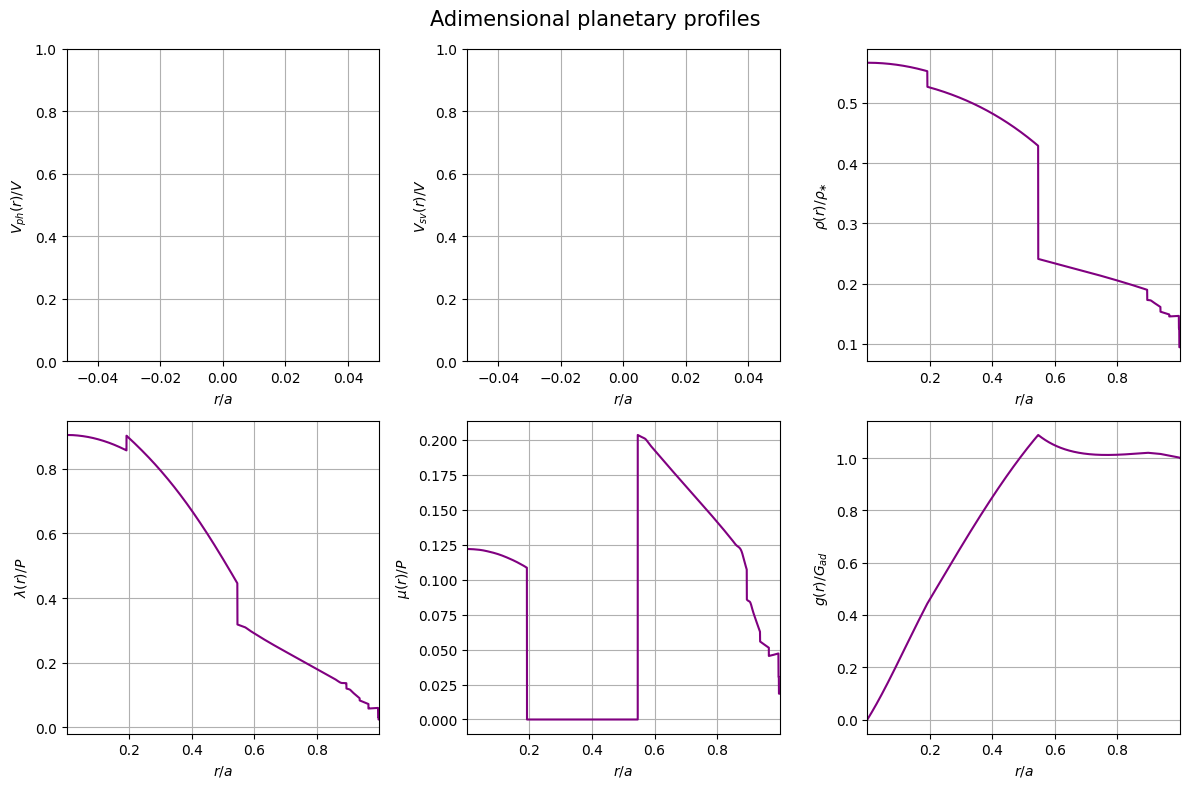

In [27]:
#Adimensional radius
rs_ad = np.arange(1e3, 6371e3, 500)/L

#Plot planetary profiles
fig, axs = plt.subplots(2,3,figsize=(12,8))

ax0 = axs[0,0]
#ax0.plot(rs_ad, Vph_prem_ad(rs_ad), color='purple', ms=5)
ax0.set(xlabel=r'$r/a$', ylabel=r'$V_{ph}(r)/V$')
ax0.grid()
ax0.margins(x=0)

ax1 = axs[0,1]
#ax1.plot(rs_ad, Vsv_prem_ad(rs_ad), color='purple', ms=5)
ax1.set(xlabel=r'$r/a$', ylabel=r'$V_{sv}(r)/V$')
ax1.grid()
ax1.margins(x=0)

ax2 = axs[0,2]
ax2.plot(rs_ad, rho_prem_ad(rs_ad), color='purple', ms=5)
ax2.set(xlabel=r'$r/a$', ylabel=r'$\rho(r)/\rho_{\ast}$')
ax2.grid()
ax2.margins(x=0)

ax3 = axs[1,0]
ax3.plot(rs_ad, lamb_prem_ad(rs_ad), color='purple', ms=5)
ax3.set(xlabel=r'$r/a$', ylabel=r'$\lambda(r)/P$')
ax3.grid()
ax3.margins(x=0)

ax4 = axs[1,1]
ax4.plot(rs_ad, mu_prem_ad(rs_ad), color='purple', ms=5)
ax4.set(xlabel=r'$r/a$', ylabel=r'$\mu(r)/P$')
ax4.grid()
ax4.margins(x=0)

ax5 = axs[1,2]
ax5.plot(rs_ad, g_prem_ad(rs_ad), color='purple', ms=5)
ax5.set(xlabel=r'$r/a$', ylabel=r'$g(r)/G_{ad}$')
ax5.grid()
ax5.margins(x=0)

fig.suptitle('Adimensional planetary profiles', fontsize=15)
fig.tight_layout();

## Integration parameters

In [28]:
#Degree
n = 2

#Linear frequency in [cycles/day] 
f_day = 1.935022 	#M2 frequency

#Linear frequency in [cycles/s]
f_s = f_day*(1/(3600*24))

#Angular frequency in [rad/s]
omega = f_s*2*np.pi

#Number of variables
n_ys = 6

#Number of solutions
n_sol = 5

#Parametros adimensionales
params_ad = dict(n=n,
			  omega=omega/OMEGA,
			  lam=lamb_prem_ad,
			  mu=mu_prem_ad,
			  rho=rho_prem_ad,
			  g=g_prem_ad)
params_ad

{'n': 2,
 'omega': 0.11334455955539151,
 'lam': <function __main__.<lambda>(r_ad)>,
 'mu': <function __main__.<lambda>(r_ad)>,
 'rho': <function __main__.<lambda>(r_ad)>,
 'g': <function __main__.<lambda>(r_ad)>}

## Layers

In [29]:
#Total steps
nsteps_total = 50000

#Delta r for transition
dr = 1

#Initial radius for integration
r0_integration = 6e3 #int(L/1e3)	#Approx. a thousand parts of the radius

#First layer: Inner core
r0_inner_ad = r0_integration/L
rf_inner_ad = r_icb/L
nsteps_inner = int(rf_inner_ad*nsteps_total)

#Second layer: Outer core
r0_outer_ad = (r_icb+dr)/L
rf_outer_ad = r_cmb/L
nsteps_outer = int((rf_outer_ad - r0_outer_ad)*nsteps_total)

#Third layer: Mantle + crust
r0_mantle_ad = (r_cmb+dr)/L
rf_mantle_ad = 1 #r_repetti/L
nsteps_mantle = int((rf_mantle_ad - r0_mantle_ad)*nsteps_total)

integrate_litosphere = False

#Fourth layer: Litosphere (Crust + Upper Mantle)
#r0_lit_ad = (r_repetti+dr)/L
#rf_lit_ad = 1
#nsteps_lit = int((rf_lit_ad - r0_lit_ad)*nsteps_total)

#Step of integration (including the final point)
rs_inner_ad = np.linspace(r0_inner_ad, rf_inner_ad, nsteps_inner)
rs_outer_ad = np.linspace(r0_outer_ad, rf_outer_ad, nsteps_outer)
rs_mantle_ad = np.linspace(r0_mantle_ad, rf_mantle_ad, nsteps_mantle)
#rs_lit_ad = np.linspace(r0_lit_ad, rf_lit_ad, nsteps_lit)

In [30]:
#Integration ranges
print('Delta r for transition:', dr, 'm \n')

print('Integration starts at r0 =', r0_integration, 'm \n')

print('Integration in the inner core:')
print(f'From {rs_inner_ad[0]} to {rs_inner_ad[-1]}')
print(f'Steps of {(rs_inner_ad[1] - rs_inner_ad[0])*L:.1f} m\n')

print('Integration in the outer core:')
print(f'From {rs_outer_ad[0]} to {rs_outer_ad[-1]}')
print(f'Steps of {(rs_outer_ad[1] - rs_outer_ad[0])*L:.1f} m\n')

if integrate_litosphere:
	print('Integration in the lower mantle:')
	print(f'From {rs_mantle_ad[0]} to {rs_mantle_ad[-1]}')
	print(f'Steps of {(rs_mantle_ad[1] - rs_mantle_ad[0])*L:.1f} m\n')
	
	print('Integration in the litosphere:')
	print(f'From {rs_lit_ad[0]} to {rs_lit_ad[-1]}')
	print(f'Steps of {(rs_lit_ad[1] - rs_lit_ad[0])*L:.1f} m\n')

else:
	print('Integration in the mantle+crust:')
	print(f'From {rs_mantle_ad[0]} to {rs_mantle_ad[-1]}')
	print(f'Steps of {(rs_mantle_ad[1] - rs_mantle_ad[0])*L:.1f} m\n')

print('Total steps:', nsteps_inner + nsteps_outer + nsteps_mantle)#+ nsteps_lit)

Delta r for transition: 1 m 

Integration starts at r0 = 6000.0 m 

Integration in the inner core:
From 0.0009417673834562863 to 0.19164966253335425
Steps of 126.8 m

Integration in the outer core:
From 0.19164981949458484 to 0.5462250824046461
Steps of 127.4 m

Integration in the mantle+crust:
From 0.5462252393658766 to 1.0
Steps of 127.4 m

Total steps: 49998


## Adimensional coupled ODEs

In [31]:
from tspice.utils import *

In [32]:
#Set of equations to use for each layer

#Inner core (solid)
equations_set_inner = 'AmorinGudkova2024'

#Outer core (fluid)
equations_set_outer = 'AmorinGudkova2024'

#Mantle+lithosphere (solid)
equations_set_mantle = 'AmorinGudkova2024'

## Initial solutions

In [33]:
#Internal independent solutions

if equations_set_inner == 'XuSun2003_ad':
	Y0_inner_ad = Y0_XuSun2003_ad(rs_inner_ad[0], params_ad)
elif equations_set_inner == 'AmorinGudkova2024':
	Y0_inner_ad = Y0_AmorinGudkova2024_ad(rs_inner_ad[0], params_ad)

Y0_1_inner_ad, Y0_2_inner_ad, Y0_3_inner_ad = Y0_inner_ad[:,0], Y0_inner_ad[:,1], Y0_inner_ad[:,2]

In [34]:
print('Initial conditions at the center:')
print('Y0_1_inner_ad:', Y0_1_inner_ad)
print('Y0_2_inner_ad:', Y0_2_inner_ad)
print('Y0_3_inner_ad:', Y0_3_inner_ad)

Initial conditions at the center:
Y0_1_inner_ad: [ 9.44322501e-04  4.00000000e+00  4.72161250e-04  2.00000000e+00
  2.10556246e-06 -2.25395396e-03]
Y0_2_inner_ad: [ 0.00000000e+00 -4.81723884e-06  8.35277794e-10  2.16203012e-07
  0.00000000e+00  0.00000000e+00]
Y0_3_inner_ad: [ 8.35277794e-10  4.66297474e-06  0.00000000e+00  1.08101506e-07
  0.00000000e+00 -5.94885016e-09]


In [35]:
#Testing the function with the ODEs
dydr_solid_XuSun2003_ad(rs_inner_ad[0], Y0_1_inner_ad, params_ad)

array([ 4.27133913e+00,  1.02714016e+04,  1.59086344e+01, -9.12350726e+03,
       -8.97938175e-03,  4.04545012e+01])

## Integration

### Inner core

In [36]:
#Integration in the inner core

if equations_set_inner == 'XuSun2003_ad':
	y_1_inner_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_inner_ad, rf_inner_ad), Y0_1_inner_ad, t_eval=rs_inner_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_2_inner_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_inner_ad, rf_inner_ad), Y0_2_inner_ad, t_eval=rs_inner_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_3_inner_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_inner_ad, rf_inner_ad), Y0_3_inner_ad, t_eval=rs_inner_ad, method='BDF', args=(params_ad,), dense_output=False)

elif equations_set_inner == 'AmorinGudkova2024':
	y_1_inner_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_inner_ad, rf_inner_ad), Y0_1_inner_ad, t_eval=rs_inner_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_2_inner_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_inner_ad, rf_inner_ad), Y0_2_inner_ad, t_eval=rs_inner_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_3_inner_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_inner_ad, rf_inner_ad), Y0_3_inner_ad, t_eval=rs_inner_ad, method='BDF', args=(params_ad,), dense_output=False)

/var/folders/xn/75ncx53144919w099wx5x5mw0000gn/T/ipykernel_44693/2962595188.py:117: UserWarning: The figure layout has changed to tight
  fig.tight_layout();


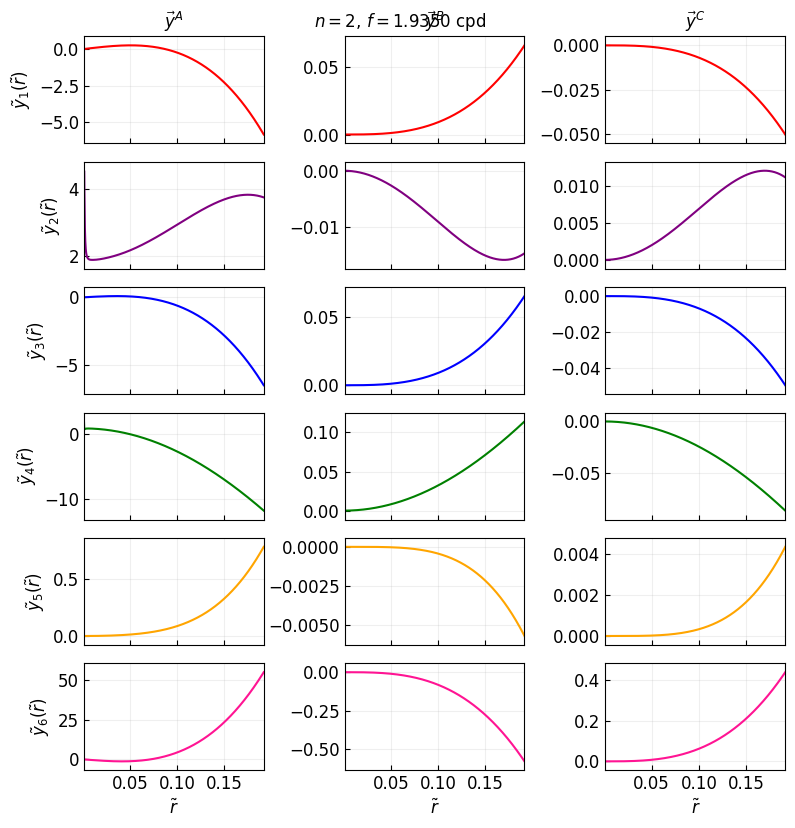

In [37]:
#Plot the solutions
fig, axs = plt.subplots(6,3,figsize=(8,8.75), sharex=True, constrained_layout=True)

#y1_1
y1_1 = y_1_inner_ad.y[0,:]
ax1 = axs[0,0]
ax1.plot(rs_inner_ad, y1_1, color='red', ms=5)
ax1.set_ylabel(r'$\tilde{y}_1(\tilde{r})$', fontsize=12)
ax1.set_title(r'$\vec{y}^{A}$', fontsize=12)

#y1_2
y1_2 = y_2_inner_ad.y[0,:]
ax2 = axs[0,1]
ax2.plot(rs_inner_ad, y1_2, color='red', ms=5)
ax2.set_title(r'$\vec{y}^{B}$', fontsize=12)

#y1_3
y1_3 = y_3_inner_ad.y[0,:]
ax3 = axs[0,2]
ax3.plot(rs_inner_ad, y1_3, color='red', ms=5)
ax3.set_title(r'$\vec{y}^{C}$', fontsize=12)

#y2_1
y2_1 = y_1_inner_ad.y[1,:]
ax1 = axs[1,0]
ax1.plot(rs_inner_ad, y2_1, color='purple', ms=5)
ax1.set_ylabel(r'$\tilde{y}_2(\tilde{r})$', fontsize=12)

#y2_2
y2_2 = y_2_inner_ad.y[1,:]
ax2 = axs[1,1]
ax2.plot(rs_inner_ad, y2_2, color='purple', ms=5)

#y2_3
y2_3 = y_3_inner_ad.y[1,:]
ax3 = axs[1,2]
ax3.plot(rs_inner_ad, y2_3, color='purple', ms=5)

#y3_1
y3_1 = y_1_inner_ad.y[2,:]
ax1 = axs[2,0]
ax1.plot(rs_inner_ad, y3_1, color='blue', ms=5)
ax1.set_ylabel(r'$\tilde{y}_3(\tilde{r})$', fontsize=12)

#y3_2
y3_2 = y_2_inner_ad.y[2,:]
ax2 = axs[2,1]
ax2.plot(rs_inner_ad, y3_2, color='blue', ms=5)

#y3_3
y3_3 = y_3_inner_ad.y[2,:]
ax3 = axs[2,2]
ax3.plot(rs_inner_ad, y3_3, color='blue', ms=5)

#y4_1
y4_1 = y_1_inner_ad.y[3,:]
ax1 = axs[3,0]
ax1.plot(rs_inner_ad, y4_1, color='green', ms=5)
ax1.set_ylabel(r'$\tilde{y}_4(\tilde{r})$', fontsize=12)

#y4_2
y4_2 = y_2_inner_ad.y[3,:]
ax2 = axs[3,1]
ax2.plot(rs_inner_ad, y4_2, color='green', ms=5)

#y4_3
y4_3 = y_3_inner_ad.y[3,:]
ax3 = axs[3,2]
ax3.plot(rs_inner_ad, y4_3, color='green', ms=5)

#y5_1
y5_1 = y_1_inner_ad.y[4,:]
ax1 = axs[4,0]
ax1.plot(rs_inner_ad, y5_1, color='orange', ms=5)
ax1.set_ylabel(r'$\tilde{y}_5(\tilde{r})$', fontsize=12)

#y5_2
y5_2 = y_2_inner_ad.y[4,:]
ax2 = axs[4,1]
ax2.plot(rs_inner_ad, y5_2, color='orange', ms=5)

#y5_3
y5_3 = y_3_inner_ad.y[4,:]
ax3 = axs[4,2]
ax3.plot(rs_inner_ad, y5_3, color='orange', ms=5)

#y6_1
y6_1 = y_1_inner_ad.y[5,:]
ax1 = axs[5,0]
ax1.plot(rs_inner_ad, y6_1, color='deeppink', ms=5)
ax1.set_xlabel(r'$\tilde{r}$', fontsize=12)
ax1.set_ylabel(r'$\tilde{y}_6(\tilde{r})$', fontsize=12)

#y6_2
y6_2 = y_2_inner_ad.y[5,:]
ax2 = axs[5,1]
ax2.plot(rs_inner_ad, y6_2, color='deeppink', ms=5)
ax2.set_xlabel(r'$\tilde{r}$', fontsize=12)#, ylabel=r'$\tilde{y}_2(\tilde{r})$')

#y6_3
y6_3 = y_3_inner_ad.y[5,:]
ax3 = axs[5,2]
ax3.plot(rs_inner_ad, y6_3, color='deeppink', ms=5)
ax3.set_xlabel(r'$\tilde{r}$', fontsize=12)#, ylabel=r'$\tilde{y}_3(\tilde{r})$')

for ax in axs.flat:
    ax.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
    ax.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
    ax.grid(alpha=0.2)
    ax.margins(x=0, y=0.1)

fig.suptitle(r'$n=%.0f$, $f = %.4f$ cpd' %(n, omega*(3600*24)/(2*np.pi)),
             fontsize=12,
			#+ f'; ODEs version: {equations_set_inner}',
            y=0.94)

fig.tight_layout();
fig.savefig(path + 'InternalSolutions_inner_core.png', bbox_inches='tight', dpi=300)

### Outer core

In [38]:
#Initial conditions at the outer core = final conditions of the inner core

if (equations_set_outer == 'XuSun2003_ad') or (equations_set_outer == 'AmorinGudkova2024modified'):

	#In this approach, after the inner core we keep with three integrations
	Y0_1_outer_ad = y_1_inner_ad.y[[0,1,4,5],-1]
	Y0_2_outer_ad = y_2_inner_ad.y[[0,1,4,5],-1]
	Y0_3_outer_ad = y_3_inner_ad.y[[0,1,4,5],-1]

elif equations_set_outer == 'AmorinGudkova2024':

	#We use the yis to define the zis
	y1_A_c, y2_A_c, y4_A_c, y5_A_c, y6_A_c = y_1_inner_ad.y[[0,1,3,4,5],-1]
	y1_B_c, y2_B_c, y4_B_c, y5_B_c, y6_B_c = y_2_inner_ad.y[[0,1,3,4,5],-1]
	y1_C_c, y2_C_c, y4_C_c, y5_C_c, y6_C_c = y_3_inner_ad.y[[0,1,3,4,5],-1]

	#Gravity and density in the ICB
	g0_icb = params_ad['g'](rs_inner_ad[-1])
	rho0_icb = params_ad['rho'](rs_inner_ad[-1])
	rs_icb = rs_inner_ad[-1]

	#New coeficients
	denom = g0_icb*rho0_icb*(y1_B_c*y4_C_c - y4_B_c*y1_C_c) + (y4_B_c*y2_C_c - y2_B_c*y4_C_c) + rho0_icb*(y4_B_c*y5_C_c - y5_B_c*y4_C_c)
	numV = g0_icb*rho0_icb*(y4_A_c*y1_C_c - y1_A_c*y4_C_c) + (y2_A_c*y4_C_c - y4_A_c*y2_C_c) + rho0_icb*(y5_A_c*y4_C_c - y4_A_c*y5_C_c)
	numS = g0_icb*rho0_icb*(y1_A_c*y4_B_c - y4_A_c*y1_B_c) + (y4_A_c*y2_B_c - y2_A_c*y4_B_c) + rho0_icb*(y4_A_c*y5_B_c - y5_A_c*y4_B_c)
	V_A = numV/denom
	S_A = numS/denom

	#Functions to combine the yis then
	B_from_A = lambda A: A*V_A
	C_from_A = lambda A: A*S_A

	#New variables (combinations of the yis)
	z1_til = y1_A_c + V_A*y1_B_c + S_A*y1_C_c
	z5_til = y5_A_c + V_A*y5_B_c + S_A*y5_C_c
	z6_til = y6_A_c + V_A*y6_B_c + S_A*y6_C_c
	z7_til = z6_til + 4*np.pi*rho0_icb*z1_til + ((n+1)/rs_icb - 4*np.pi*rho0_icb/g0_icb)*z5_til

	#In this approach, after the inner core we just keep with one integration
	Z0_outer_ad = np.array([z5_til, z7_til])	

In [39]:
#Integration in the outer core (fluid)

if equations_set_outer == 'XuSun2003':
	y_1_outer_ad_redu = solve_ivp(dydr_fluid_XuSun2003_ad, (r0_outer_ad, rf_outer_ad), Y0_1_outer_ad, t_eval=rs_outer_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_2_outer_ad_redu = solve_ivp(dydr_fluid_XuSun2003_ad, (r0_outer_ad, rf_outer_ad), Y0_2_outer_ad, t_eval=rs_outer_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_3_outer_ad_redu = solve_ivp(dydr_fluid_XuSun2003_ad, (r0_outer_ad, rf_outer_ad), Y0_3_outer_ad, t_eval=rs_outer_ad, method='BDF', args=(params_ad,), dense_output=False)

elif equations_set_outer == 'AmorinGudkova2024modified':
	y_1_outer_ad_redu = solve_ivp(dydr_fluid_AmorinGudkova2024_ad, (r0_outer_ad, rf_outer_ad), Y0_1_outer_ad, t_eval=rs_outer_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_2_outer_ad_redu = solve_ivp(dydr_fluid_AmorinGudkova2024_ad, (r0_outer_ad, rf_outer_ad), Y0_2_outer_ad, t_eval=rs_outer_ad, method='BDF', args=(params_ad,), dense_output=False)
	y_3_outer_ad_redu = solve_ivp(dydr_fluid_AmorinGudkova2024_ad, (r0_outer_ad, rf_outer_ad), Y0_3_outer_ad, t_eval=rs_outer_ad, method='BDF', args=(params_ad,), dense_output=False)

elif equations_set_outer == 'AmorinGudkova2024':
	z_outer_ad_redu = solve_ivp(dzdr_fluid_AmorinGudkova2024_ad, (r0_outer_ad, rf_outer_ad), Z0_outer_ad, t_eval=rs_outer_ad, method='BDF', args=(params_ad,), dense_output=False)


In [40]:
if (equations_set_outer == 'XuSun2003') or (equations_set_outer == 'AmorinGudkova2024modified'):
    
	#y3 calculation
	y1_1_ad, y2_1_ad = y_1_outer_ad_redu.y[:2]
	y5_1_ad, y6_1_ad = y_1_outer_ad_redu.y[2:]
	y3_1_ad = (params_ad['g'](rs_outer_ad)*y1_1_ad - y2_1_ad/params_ad['rho'](rs_outer_ad) - y5_1_ad)/(params_ad['omega']**2*rs_outer_ad)

	y1_2_ad, y2_2_ad = y_2_outer_ad_redu.y[:2]
	y5_2_ad, y6_2_ad = y_2_outer_ad_redu.y[2:]
	y3_2_ad = (params_ad['g'](rs_outer_ad)*y1_2_ad - y2_2_ad/params_ad['rho'](rs_outer_ad) - y5_2_ad)/(params_ad['omega']**2*rs_outer_ad)

	y1_3_ad, y2_3_ad = y_3_outer_ad_redu.y[:2]
	y5_3_ad, y6_3_ad = y_3_outer_ad_redu.y[2:]
	y3_3_ad = (params_ad['g'](rs_outer_ad)*y1_3_ad - y2_3_ad/params_ad['rho'](rs_outer_ad) - y5_3_ad)/(params_ad['omega']**2*rs_outer_ad)

	#New array with all variables
	y_1_outer_ad = np.zeros((6, len(rs_outer_ad)))
	y_1_outer_ad[:2] =	y1_1_ad, y2_1_ad
	y_1_outer_ad[4:] = y5_1_ad, y6_1_ad
	y_1_outer_ad[2] = 	y3_1_ad

	y_2_outer_ad = np.zeros((6, len(rs_outer_ad)))
	y_2_outer_ad[:2] =	y1_2_ad, y2_2_ad
	y_2_outer_ad[4:] = y5_2_ad, y6_2_ad
	y_2_outer_ad[2] = 	y3_2_ad

	y_3_outer_ad = np.zeros((6, len(rs_outer_ad)))
	y_3_outer_ad[:2] = y1_3_ad, y2_3_ad
	y_3_outer_ad[4:] = y5_3_ad, y6_3_ad
	y_3_outer_ad[2] = y3_3_ad

elif equations_set_outer == 'AmorinGudkova2024':

	#In this approach, we don't need to calculate all the zis in the outer core
	z5_outer_ad = z_outer_ad_redu.y[0,:]
	z7_outer_ad = z_outer_ad_redu.y[1,:]

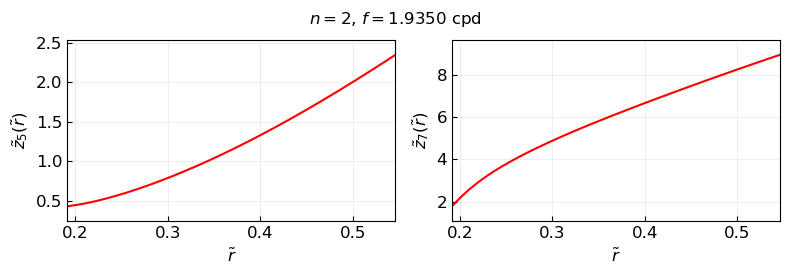

In [ ]:
#Plot the solutions

if (equations_set_outer == 'XuSun2003') or (equations_set_outer == 'AmorinGudkova2024modified'):
	fig, axs = plt.subplots(6,3,figsize=(10,15), sharex=True)

	#y1_1
	y1_1 = y_1_outer_ad[0,:]
	ax1 = axs[0,0]
	ax1.plot(rs_outer_ad, y1_1, color='red', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_1(r)$')
	ax1.set_title('1st solution')
	ax1.grid()
	ax1.margins(0)

	#y1_2
	y1_2 = y_2_outer_ad[0,:]
	ax2 = axs[0,1]
	ax2.plot(rs_outer_ad, y1_2, color='red', ms=5)
	ax2.set_title('2nd solution')
	ax2.grid()
	ax2.margins(0)

	#y1_3
	y1_3 = y_3_outer_ad[0,:]
	ax3 = axs[0,2]
	ax3.plot(rs_outer_ad, y1_3, color='red', ms=5)
	ax3.set_title('3rd solution')
	ax3.grid()
	ax3.margins(0)

	#y2_1
	y2_1 = y_1_outer_ad[1,:]
	ax1 = axs[1,0]
	ax1.plot(rs_outer_ad, y2_1, color='purple', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_2(r)$')
	ax1.grid()
	ax1.margins(0)

	#y2_2
	y2_2 = y_2_outer_ad[1,:]
	ax2 = axs[1,1]
	ax2.plot(rs_outer_ad, y2_2, color='purple', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y2_3
	y2_3 = y_3_outer_ad[1,:]
	ax3 = axs[1,2]
	ax3.plot(rs_outer_ad, y2_3, color='purple', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y3_1
	y3_1 = y_1_outer_ad[2,:]
	ax1 = axs[2,0]
	ax1.plot(rs_outer_ad, y3_1, color='blue', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_3(r)$')
	ax1.grid()
	ax1.margins(0)

	#y3_2
	y3_2 = y_2_outer_ad[2,:]
	ax2 = axs[2,1]
	ax2.plot(rs_outer_ad, y3_2, color='blue', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y3_3
	y3_3 = y_3_outer_ad[2,:]
	ax3 = axs[2,2]
	ax3.plot(rs_outer_ad, y3_3, color='blue', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y4_1
	y4_1 = y_1_outer_ad[3,:]
	ax1 = axs[3,0]
	ax1.plot(rs_outer_ad, y4_1, color='green', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_4(r)$')
	ax1.grid()
	ax1.margins(0)

	#y4_2
	y4_2 = y_2_outer_ad[3,:]
	ax2 = axs[3,1]
	ax2.plot(rs_outer_ad, y4_2, color='green', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y4_3
	y4_3 = y_3_outer_ad[3,:]
	ax3 = axs[3,2]
	ax3.plot(rs_outer_ad, y4_3, color='green', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y5_1
	y5_1 = y_1_outer_ad[4,:]
	ax1 = axs[4,0]
	ax1.plot(rs_outer_ad, y5_1, color='orange', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_5(r)$')
	ax1.grid()
	ax1.margins(0)

	#y5_2
	y5_2 = y_2_outer_ad[4,:]
	ax2 = axs[4,1]
	ax2.plot(rs_outer_ad, y5_2, color='orange', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y5_3
	y5_3 = y_3_outer_ad[4,:]
	ax3 = axs[4,2]
	ax3.plot(rs_outer_ad, y5_3, color='orange', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y6_1
	y6_1 = y_1_outer_ad[5,:]
	ax1 = axs[5,0]
	ax1.plot(rs_outer_ad, y6_1, color='deeppink', ms=5)
	ax1.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6(r)$')
	ax1.grid()
	ax1.margins(0)

	#y6_2
	y6_2 = y_2_outer_ad[5,:]
	ax2 = axs[5,1]
	ax2.plot(rs_outer_ad, y6_2, color='deeppink', ms=5)
	ax2.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_2(r)$')
	ax2.grid()
	ax2.margins(0)

	#y6_3
	y6_3 = y_3_outer_ad[5,:]
	ax3 = axs[5,2]
	ax3.plot(rs_outer_ad, y6_3, color='deeppink', ms=5)
	ax3.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_3(r)$')
	ax3.grid()
	ax3.margins(0)

	fig.suptitle(r'$f = %.4f $ cycles/day' %(omega*(3600*24)/(2*np.pi)),
				#+ f'; ODEs version: {equations_set_outer}',
				y=0.96)
	fig.tight_layout(rect=[0, 0, 1, 0.97]);

elif equations_set_outer == 'AmorinGudkova2024':
	fig, axs = plt.subplots(1,2,figsize=(8,3), sharex=True)

	#z5
	ax1 = axs[0]
	ax1.plot(rs_outer_ad, z5_outer_ad, color='red', ms=5)
	ax1.set_ylabel(r'$\tilde{z}_5(\tilde{r})$', fontsize=12)
	ax1.set_xlabel(r'$\tilde{r}$', fontsize=12)

	#z7
	ax2 = axs[1]
	ax2.plot(rs_outer_ad, z7_outer_ad, color='red', ms=5)
	ax2.set_ylabel(r'$\tilde{z}_7(\tilde{r})$', fontsize=12)
	ax2.set_xlabel(r'$\tilde{r}$', fontsize=12)

	for ax in axs.flat:
		ax.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
		ax.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
		ax.grid(alpha=0.2)
		ax.margins(x=0, y=0.1)

	fig.suptitle(r'$n=%.0f$, $f = %.4f $ cpd' %(n, omega*(3600*24)/(2*np.pi)),
			  fontsize=12,
			  y=0.9)
	fig.tight_layout(rect=[0, 0, 1, 0.97]);
	fig.savefig(path + 'InternalSolutions_outer_core.png', bbox_inches='tight', dpi=300)

### Mantle

In [41]:
#Initial conditions at the mantle = final conditions of the outer core
if (equations_set_outer == 'XuSun2003') or (equations_set_outer == 'AmorinGudkova2024modified'):

	#In this approach, after the outer core we keep with three integrations
	Y0_1_mantle_ad = y_1_outer_ad[:,-1]
	Y0_2_mantle_ad = y_2_outer_ad[:,-1]
	Y0_3_mantle_ad = y_3_outer_ad[:,-1]

	#New independent solution at the CMB
	Y0_4_mantle_ad = np.zeros(n_ys)
	Y0_4_mantle_ad[2] = 1	#Discontinuity in the tangential displacement
	#print(Y0_4_mantle_ad)

	#New independent solution at the CMB
	if n_sol == 5:
		Y0_5_mantle_ad = np.zeros(n_ys)
		Y0_5_mantle_ad[1] = 1	#Discontinuity in the normal pressure
		#print(Y0_5_mantle_ad)

elif equations_set_outer == 'AmorinGudkova2024':

	#Solutions zis at the CMB
	z5_b, z7_b = z5_outer_ad[-1], z7_outer_ad[-1]

	#Gravity and density at the CMB
	g0_cmb = params_ad['g'](rs_outer_ad[-1])
	rho0_cmb = params_ad['rho'](rs_outer_ad[-1])
	rs_cmb = rs_outer_ad[-1]
	
	#New three independent solutions from the zis
	Y0_alpha_mantle_ad = np.array([0, -rho0_cmb*z5_b, 0, 0, z5_b, z7_b - ((n+1)/rs_cmb - 4*np.pi*rho0_cmb/g0_cmb)*z5_b])	#Alpha solution (coefficient A)
	Y0_beta_mantle_ad = np.array([1, rho0_cmb*g0_cmb, 0, 0, 0, -4*np.pi*rho0_cmb])	#Beta solution (coefficient D=z1_b)
	Y0_gamma_mantle_ad = np.array([0, 0, 1, 0, 0, 0])	#Beta solution (coefficient E=y3_b / discontinuity in the tangential displacement)


In [42]:
#Integration
if equations_set_mantle == 'XuSun2003_ad':
	y_1_mantle_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_mantle_ad, rf_mantle_ad), Y0_1_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_2_mantle_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_mantle_ad, rf_mantle_ad), Y0_2_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_3_mantle_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_mantle_ad, rf_mantle_ad), Y0_3_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_4_mantle_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_mantle_ad, rf_mantle_ad), Y0_4_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	if n_sol == 5:
		y_5_mantle_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_mantle_ad, rf_mantle_ad), Y0_5_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)

#We should check how to continue in the mantle with depending on the outer core equations
elif (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified'):
	y_1_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_1_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_2_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_2_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_3_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_3_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_4_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_4_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	if n_sol == 5:
		y_5_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_5_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)

elif (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):
	y_alpha_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_alpha_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_beta_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_beta_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)
	y_gamma_mantle_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_mantle_ad, rf_mantle_ad), Y0_gamma_mantle_ad, t_eval=rs_mantle_ad, method='BDF', args=(params_ad,), dense_output=True)

In [43]:
#Plot the solutions

if (equations_set_mantle == 'XuSun2003_ad') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
	fig, axs = plt.subplots(6,5,figsize=(10,15), sharex=True)

	#y1_1
	y1_1 = y_1_mantle_ad.y[0,:]
	ax1 = axs[0,0]
	ax1.plot(rs_mantle_ad, y1_1, color='red', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_1(r)$')
	ax1.set_title('1st solution')
	ax1.grid()
	ax1.margins(0)

	#y1_2
	y1_2 = y_2_mantle_ad.y[0,:]
	ax2 = axs[0,1]
	ax2.plot(rs_mantle_ad, y1_2, color='red', ms=5)
	ax2.set_title('2nd solution')
	ax2.grid()
	ax2.margins(0)

	#y1_3
	y1_3 = y_3_mantle_ad.y[0,:]
	ax3 = axs[0,2]
	ax3.plot(rs_mantle_ad, y1_3, color='red', ms=5)
	ax3.set_title('3rd solution')
	ax3.grid()
	ax3.margins(0)

	#y1_4
	y1_4 = y_4_mantle_ad.y[0,:]
	ax4 = axs[0,3]
	ax4.plot(rs_mantle_ad, y1_4, color='red', ms=5)
	ax4.set_title('4th solution')
	ax4.grid()
	ax4.margins(0)

	#y1_5
	y1_5 = y_5_mantle_ad.y[0,:]
	ax5 = axs[0,4]
	ax5.plot(rs_mantle_ad, y1_5, color='red', ms=5)
	ax5.set_title('5th solution')
	ax5.grid()
	ax5.margins(0)

	#y2_1
	y2_1 = y_1_mantle_ad.y[1,:]
	ax1 = axs[1,0]
	ax1.plot(rs_mantle_ad, y2_1, color='purple', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_2(r)$')
	ax1.grid()
	ax1.margins(0)

	#y2_2
	y2_2 = y_2_mantle_ad.y[1,:]
	ax2 = axs[1,1]
	ax2.plot(rs_mantle_ad, y2_2, color='purple', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y2_3
	y2_3 = y_3_mantle_ad.y[1,:]
	ax3 = axs[1,2]
	ax3.plot(rs_mantle_ad, y2_3, color='purple', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y2_4
	y2_4 = y_4_mantle_ad.y[1,:]
	ax4 = axs[1,3]
	ax4.plot(rs_mantle_ad, y2_4, color='purple', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y2_5
	y2_5 = y_5_mantle_ad.y[1,:]
	ax5 = axs[1,4]
	ax5.plot(rs_mantle_ad, y2_5, color='purple', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y3_1
	y3_1 = y_1_mantle_ad.y[2,:]
	ax1 = axs[2,0]
	ax1.plot(rs_mantle_ad, y3_1, color='blue', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_3(r)$')
	ax1.grid()
	ax1.margins(0)

	#y3_2
	y3_2 = y_2_mantle_ad.y[2,:]
	ax2 = axs[2,1]
	ax2.plot(rs_mantle_ad, y3_2, color='blue', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y3_3
	y3_3 = y_3_mantle_ad.y[2,:]
	ax3 = axs[2,2]
	ax3.plot(rs_mantle_ad, y3_3, color='blue', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y3_4
	y3_4 = y_4_mantle_ad.y[2,:]
	ax4 = axs[2,3]
	ax4.plot(rs_mantle_ad, y3_4, color='blue', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y3_5
	y3_5 = y_5_mantle_ad.y[2,:]
	ax5 = axs[2,4]
	ax5.plot(rs_mantle_ad, y3_5, color='blue', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y4_1
	y4_1 = y_1_mantle_ad.y[3,:]
	ax1 = axs[3,0]
	ax1.plot(rs_mantle_ad, y4_1, color='green', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_4(r)$')
	ax1.grid()
	ax1.margins(0)

	#y4_2
	y4_2 = y_2_mantle_ad.y[3,:]
	ax2 = axs[3,1]
	ax2.plot(rs_mantle_ad, y4_2, color='green', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y4_3
	y4_3 = y_3_mantle_ad.y[3,:]
	ax3 = axs[3,2]
	ax3.plot(rs_mantle_ad, y4_3, color='green', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y4_4
	y4_4 = y_4_mantle_ad.y[3,:]
	ax4 = axs[3,3]
	ax4.plot(rs_mantle_ad, y4_4, color='green', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y4_5
	y4_5 = y_5_mantle_ad.y[3,:]
	ax5 = axs[3,4]
	ax5.plot(rs_mantle_ad, y4_5, color='green', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y5_1
	y5_1 = y_1_mantle_ad.y[4,:]
	ax1 = axs[4,0]
	ax1.plot(rs_mantle_ad, y5_1, color='orange', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_5(r)$')
	ax1.grid()
	ax1.margins(0)

	#y5_2
	y5_2 = y_2_mantle_ad.y[4,:]
	ax2 = axs[4,1]
	ax2.plot(rs_mantle_ad, y5_2, color='orange', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y5_3
	y5_3 = y_3_mantle_ad.y[4,:]
	ax3 = axs[4,2]
	ax3.plot(rs_mantle_ad, y5_3, color='orange', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y5_4
	y5_4 = y_4_mantle_ad.y[4,:]
	ax4 = axs[4,3]
	ax4.plot(rs_mantle_ad, y5_4, color='orange', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y5_5
	y5_5 = y_5_mantle_ad.y[4,:]
	ax5 = axs[4,4]
	ax5.plot(rs_mantle_ad, y5_5, color='orange', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y6_1
	y6_1 = y_1_mantle_ad.y[5,:]
	ax1 = axs[5,0]
	ax1.plot(rs_mantle_ad, y6_1, color='deeppink', ms=5)
	ax1.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6(r)$')
	ax1.grid()
	ax1.margins(0)

	#y6_2
	y6_2 = y_2_mantle_ad.y[5,:]
	ax2 = axs[5,1]
	ax2.plot(rs_mantle_ad, y6_2, color='deeppink', ms=5)
	ax2.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_2(r)$')
	ax2.grid()
	ax2.margins(0)

	#y6_3
	y6_3 = y_3_mantle_ad.y[5,:]
	ax3 = axs[5,2]
	ax3.plot(rs_mantle_ad, y6_3, color='deeppink', ms=5)
	ax3.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_3(r)$')
	ax3.grid()
	ax3.margins(0)

	#y6_4
	y6_4 = y_4_mantle_ad.y[5,:]
	ax4 = axs[5,3]
	ax4.plot(rs_mantle_ad, y6_4, color='deeppink', ms=5)
	ax4.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_3(r)$')
	ax4.grid()
	ax4.margins(0)

	#y6_5
	y6_5 = y_5_mantle_ad.y[5,:]
	ax5 = axs[5,4]
	ax5.plot(rs_mantle_ad, y6_5, color='deeppink', ms=5)
	ax5.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_5(r)$')
	ax5.grid()
	ax5.margins(0)

	fig.suptitle(r'$f = %.4f $ cycles/day' %(omega*(3600*24)/(2*np.pi)),
					#+ f'; ODEs version: {equations_set_mantle}',
					y=0.96)
	fig.tight_layout(rect=[0, 0, 1, 0.97]);

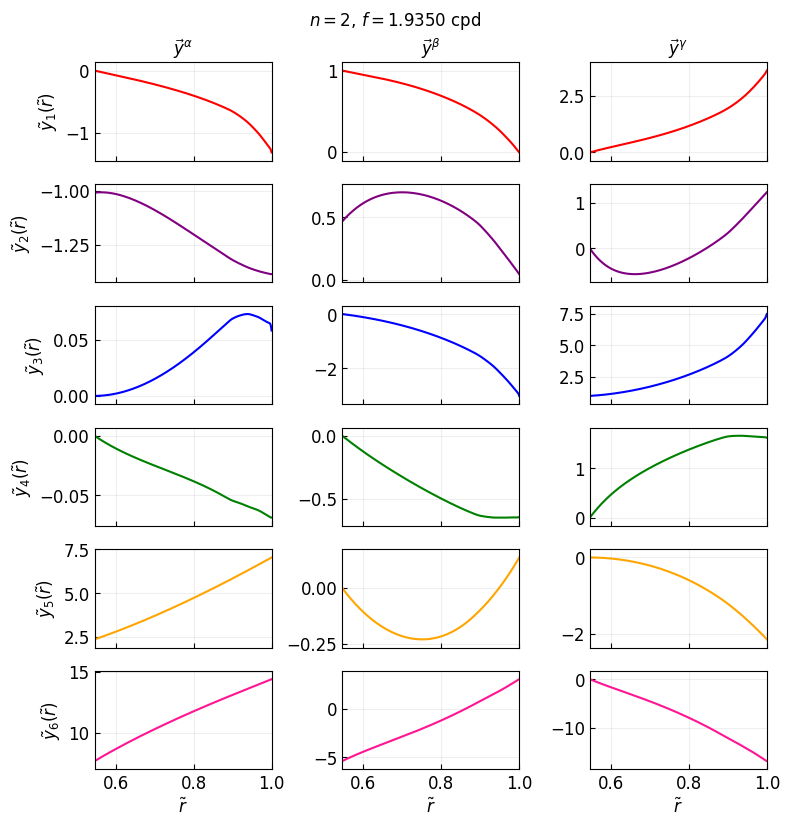

In [ ]:
if (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):

	fig, axs = plt.subplots(6,3,figsize=(8,8.75), sharex=True)

	#y1_alpha
	y1_alpha = y_alpha_mantle_ad.y[0,:]
	ax1 = axs[0,0]
	ax1.plot(rs_mantle_ad, y1_alpha, color='red', ms=5)
	ax1.set_ylabel(r'$\tilde{y}_1(\tilde{r})$', fontsize=12)
	ax1.set_title(r'$\vec{y}^{\alpha}$', fontsize=12)

	#y1_beta
	y1_beta = y_beta_mantle_ad.y[0,:]
	ax2 = axs[0,1]
	ax2.plot(rs_mantle_ad, y1_beta, color='red', ms=5)
	ax2.set_title(r'$\vec{y}^{\beta}$', fontsize=12)


	#y1_gamma
	y1_gamma = y_gamma_mantle_ad.y[0,:]
	ax3 = axs[0,2]
	ax3.plot(rs_mantle_ad, y1_gamma, color='red', ms=5)
	ax3.set_title(r'$\vec{y}^{\gamma}$', fontsize=12)


	#y2_alpha
	y2_alpha = y_alpha_mantle_ad.y[1,:]
	ax1 = axs[1,0]
	ax1.plot(rs_mantle_ad, y2_alpha, color='purple', ms=5)
	ax1.set_ylabel(r'$\tilde{y}_2(\tilde{r})$', fontsize=12)

	#y2_beta
	y2_beta = y_beta_mantle_ad.y[1,:]
	ax2 = axs[1,1]
	ax2.plot(rs_mantle_ad, y2_beta, color='purple', ms=5)

	#y2_gamma
	y2_gamma = y_gamma_mantle_ad.y[1,:]
	ax3 = axs[1,2]
	ax3.plot(rs_mantle_ad, y2_gamma, color='purple', ms=5)


	#y3_alpha
	y3_alpha = y_alpha_mantle_ad.y[2,:]
	ax1 = axs[2,0]
	ax1.plot(rs_mantle_ad, y3_alpha, color='blue', ms=5)
	ax1.set_ylabel(r'$\tilde{y}_3(\tilde{r})$', fontsize=12)


	#y3_beta
	y3_beta = y_beta_mantle_ad.y[2,:]
	ax2 = axs[2,1]
	ax2.plot(rs_mantle_ad, y3_beta, color='blue', ms=5)


	#y3_gamma
	y3_gamma = y_gamma_mantle_ad.y[2,:]
	ax3 = axs[2,2]
	ax3.plot(rs_mantle_ad, y3_gamma, color='blue', ms=5)

	#y4_alpha
	y4_alpha = y_alpha_mantle_ad.y[3,:]
	ax1 = axs[3,0]
	ax1.plot(rs_mantle_ad, y4_alpha, color='green', ms=5)
	ax1.set_ylabel(r'$\tilde{y}_4(\tilde{r})$', fontsize=12)


	#y4_beta
	y4_beta = y_beta_mantle_ad.y[3,:]
	ax2 = axs[3,1]
	ax2.plot(rs_mantle_ad, y4_beta, color='green', ms=5)

	#y4_gamma
	y4_gamma = y_gamma_mantle_ad.y[3,:]
	ax3 = axs[3,2]
	ax3.plot(rs_mantle_ad, y4_gamma, color='green', ms=5)

	#y5_alpha
	y5_alpha = y_alpha_mantle_ad.y[4,:]
	ax1 = axs[4,0]
	ax1.plot(rs_mantle_ad, y5_alpha, color='orange', ms=5)
	ax1.set_ylabel(r'$\tilde{y}_5(\tilde{r})$', fontsize=12)


	#y5_beta
	y5_beta = y_beta_mantle_ad.y[4,:]
	ax2 = axs[4,1]
	ax2.plot(rs_mantle_ad, y5_beta, color='orange', ms=5)


	#y5_gamma
	y5_gamma = y_gamma_mantle_ad.y[4,:]
	ax3 = axs[4,2]
	ax3.plot(rs_mantle_ad, y5_gamma, color='orange', ms=5)


	#y6_alpha
	y6_alpha = y_alpha_mantle_ad.y[5,:]
	ax1 = axs[5,0]
	ax1.plot(rs_mantle_ad, y6_alpha, color='deeppink', ms=5)
	ax1.set_xlabel(r'$\tilde{r}$', fontsize=12)
	ax1.set_ylabel(r'$\tilde{y}_6(\tilde{r})$', fontsize=12)


	#y6_beta
	y6_beta = y_beta_mantle_ad.y[5,:]
	ax2 = axs[5,1]
	ax2.plot(rs_mantle_ad, y6_beta, color='deeppink', ms=5)
	ax2.set_xlabel(r'$\tilde{r}$', fontsize=12)#, ylabel=r'$\tilde{y}_be\tilde{t}a(r)$')


	#y6_gamma
	y6_gamma = y_gamma_mantle_ad.y[5,:]
	ax3 = axs[5,2]
	ax3.plot(rs_mantle_ad, y6_gamma, color='deeppink', ms=5)
	ax3.set_xlabel(r'$\tilde{r}$', fontsize=12)#, ylabel=r'$\tilde{y}_ga\tilde{m}ma(r)$')

	for ax in axs.flat:
		ax.xaxis.set_tick_params(direction='in', which='both', labelsize=12)
		ax.yaxis.set_tick_params(direction='in', which='both', labelsize=12)
		ax.grid(alpha=0.2)
		ax.margins(x=0, y=0.1)


	fig.suptitle(r'$n=%.0f$, $f = %.4f$ cpd' %(n, omega*(3600*24)/(2*np.pi)),
             fontsize=12,
			#+ f'; ODEs version: {equations_set_inner}',
            y=0.94)
	
	fig.tight_layout(rect=[0, 0, 1, 0.97]);
	fig.savefig(path + 'InternalSolutions_mantle_crust.png', bbox_inches='tight', dpi=300)

In [59]:
#If we are not integrating apart the litosphere, we save the solutions at the mantle as final solutions
if not integrate_litosphere:
	y_alpha_solution_ad = y_alpha_mantle_ad.y
	y_beta_solution_ad = y_beta_mantle_ad.y
	y_gamma_solution_ad = y_gamma_mantle_ad.y

### Litosphere

In [60]:
if integrate_litosphere:
	#Initial conditions at the litosphere (upper mantle + crust) = final conditions of the lower mantle

	if (equations_set_mantle == 'XuSun2003_ad') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
		Y0_1_lit_ad = y_1_mantle_ad.y[:,-1]
		Y0_2_lit_ad = y_2_mantle_ad.y[:,-1]
		Y0_3_lit_ad = y_3_mantle_ad.y[:,-1]
		Y0_4_lit_ad = y_4_mantle_ad.y[:,-1]
		if n_sol == 5:
			Y0_5_lit_ad = y_5_mantle_ad.y[:,-1]

	elif (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):
		Y0_alpha_lit_ad = y_alpha_mantle_ad.y[:,-1]
		Y0_beta_lit_ad = y_beta_mantle_ad.y[:,-1]
		Y0_gamma_lit_ad = y_gamma_mantle_ad.y[:,-1]

In [61]:
if integrate_litosphere:
	
	#Integration
	if equations_set_mantle == 'XuSun2003_ad':
		y_1_lit_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_lit_ad, rf_lit_ad), Y0_1_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_2_lit_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_lit_ad, rf_lit_ad), Y0_2_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_3_lit_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_lit_ad, rf_lit_ad), Y0_3_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_4_lit_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_lit_ad, rf_lit_ad), Y0_4_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		if n_sol == 5:
			y_5_lit_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_lit_ad, rf_lit_ad), Y0_5_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)

	elif (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified'):
		y_1_lit_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_lit_ad, rf_lit_ad), Y0_1_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_2_lit_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_lit_ad, rf_lit_ad), Y0_2_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_3_lit_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_lit_ad, rf_lit_ad), Y0_3_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_4_lit_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_lit_ad, rf_lit_ad), Y0_4_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		if n_sol == 5:
			y_5_lit_ad = solve_ivp(dydr_solid_XuSun2003_ad, (r0_lit_ad, rf_lit_ad), Y0_5_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)

	elif (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):
		y_alpha_lit_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_lit_ad, rf_lit_ad), Y0_alpha_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_beta_lit_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_lit_ad, rf_lit_ad), Y0_beta_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)
		y_gamma_lit_ad = solve_ivp(dydr_solid_AmorinGudkova2024_ad, (r0_lit_ad, rf_lit_ad), Y0_gamma_lit_ad, t_eval=rs_lit_ad, method='BDF', args=(params_ad,), dense_output=True)

In [62]:
if integrate_litosphere:
	
	#Plot the solutions

	if (equations_set_mantle == 'XuSun2003_ad') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
		fig, axs = plt.subplots(6,5,figsize=(10,15), sharex=True)

		#y1_1
		y1_1 = y_1_lit_ad.y[0,:]
		ax1 = axs[0,0]
		ax1.plot(rs_lit_ad, y1_1, color='red', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_1(r)$')
		ax1.set_title('1st solution')
		ax1.grid()
		ax1.margins(0)

		#y1_2
		y1_2 = y_2_lit_ad.y[0,:]
		ax2 = axs[0,1]
		ax2.plot(rs_lit_ad, y1_2, color='red', ms=5)
		ax2.set_title('2nd solution')
		ax2.grid()
		ax2.margins(0)

		#y1_3
		y1_3 = y_3_lit_ad.y[0,:]
		ax3 = axs[0,2]
		ax3.plot(rs_lit_ad, y1_3, color='red', ms=5)
		ax3.set_title('3rd solution')
		ax3.grid()
		ax3.margins(0)

		#y1_4
		y1_4 = y_4_lit_ad.y[0,:]
		ax4 = axs[0,3]
		ax4.plot(rs_lit_ad, y1_4, color='red', ms=5)
		ax4.set_title('4th solution')
		ax4.grid()
		ax4.margins(0)

		#y1_5
		y1_5 = y_5_lit_ad.y[0,:]
		ax5 = axs[0,4]
		ax5.plot(rs_lit_ad, y1_5, color='red', ms=5)
		ax5.set_title('5th solution')
		ax5.grid()
		ax5.margins(0)

		#y2_1
		y2_1 = y_1_lit_ad.y[1,:]
		ax1 = axs[1,0]
		ax1.plot(rs_lit_ad, y2_1, color='purple', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_2(r)$')
		ax1.grid()
		ax1.margins(0)

		#y2_2
		y2_2 = y_2_lit_ad.y[1,:]
		ax2 = axs[1,1]
		ax2.plot(rs_lit_ad, y2_2, color='purple', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y2_3
		y2_3 = y_3_lit_ad.y[1,:]
		ax3 = axs[1,2]
		ax3.plot(rs_lit_ad, y2_3, color='purple', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y2_4
		y2_4 = y_4_lit_ad.y[1,:]
		ax4 = axs[1,3]
		ax4.plot(rs_lit_ad, y2_4, color='purple', ms=5)
		ax4.grid()
		ax4.margins(0)

		#y2_5
		y2_5 = y_5_lit_ad.y[1,:]
		ax5 = axs[1,4]
		ax5.plot(rs_lit_ad, y2_5, color='purple', ms=5)
		ax5.grid()
		ax5.margins(0)

		#y3_1
		y3_1 = y_1_lit_ad.y[2,:]
		ax1 = axs[2,0]
		ax1.plot(rs_lit_ad, y3_1, color='blue', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_3(r)$')
		ax1.grid()
		ax1.margins(0)

		#y3_2
		y3_2 = y_2_lit_ad.y[2,:]
		ax2 = axs[2,1]
		ax2.plot(rs_lit_ad, y3_2, color='blue', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y3_3
		y3_3 = y_3_lit_ad.y[2,:]
		ax3 = axs[2,2]
		ax3.plot(rs_lit_ad, y3_3, color='blue', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y3_4
		y3_4 = y_4_lit_ad.y[2,:]
		ax4 = axs[2,3]
		ax4.plot(rs_lit_ad, y3_4, color='blue', ms=5)
		ax4.grid()
		ax4.margins(0)

		#y3_5
		y3_5 = y_5_lit_ad.y[2,:]
		ax5 = axs[2,4]
		ax5.plot(rs_lit_ad, y3_5, color='blue', ms=5)
		ax5.grid()
		ax5.margins(0)

		#y4_1
		y4_1 = y_1_lit_ad.y[3,:]
		ax1 = axs[3,0]
		ax1.plot(rs_lit_ad, y4_1, color='green', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_4(r)$')
		ax1.grid()
		ax1.margins(0)

		#y4_2
		y4_2 = y_2_lit_ad.y[3,:]
		ax2 = axs[3,1]
		ax2.plot(rs_lit_ad, y4_2, color='green', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y4_3
		y4_3 = y_3_lit_ad.y[3,:]
		ax3 = axs[3,2]
		ax3.plot(rs_lit_ad, y4_3, color='green', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y4_4
		y4_4 = y_4_lit_ad.y[3,:]
		ax4 = axs[3,3]
		ax4.plot(rs_lit_ad, y4_4, color='green', ms=5)
		ax4.grid()
		ax4.margins(0)

		#y4_5
		y4_5 = y_5_lit_ad.y[3,:]
		ax5 = axs[3,4]
		ax5.plot(rs_lit_ad, y4_5, color='green', ms=5)
		ax5.grid()
		ax5.margins(0)

		#y5_1
		y5_1 = y_1_lit_ad.y[4,:]
		ax1 = axs[4,0]
		ax1.plot(rs_lit_ad, y5_1, color='orange', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_5(r)$')
		ax1.grid()
		ax1.margins(0)

		#y5_2
		y5_2 = y_2_lit_ad.y[4,:]
		ax2 = axs[4,1]
		ax2.plot(rs_lit_ad, y5_2, color='orange', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y5_3
		y5_3 = y_3_lit_ad.y[4,:]
		ax3 = axs[4,2]
		ax3.plot(rs_lit_ad, y5_3, color='orange', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y5_4
		y5_4 = y_4_lit_ad.y[4,:]
		ax4 = axs[4,3]
		ax4.plot(rs_lit_ad, y5_4, color='orange', ms=5)
		ax4.grid()
		ax4.margins(0)

		#y5_5
		y5_5 = y_5_lit_ad.y[4,:]
		ax5 = axs[4,4]
		ax5.plot(rs_lit_ad, y5_5, color='orange', ms=5)
		ax5.grid()
		ax5.margins(0)

		#y6_1
		y6_1 = y_1_lit_ad.y[5,:]
		ax1 = axs[5,0]
		ax1.plot(rs_lit_ad, y6_1, color='deeppink', ms=5)
		ax1.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6(r)$')
		ax1.grid()
		ax1.margins(0)

		#y6_2
		y6_2 = y_2_lit_ad.y[5,:]
		ax2 = axs[5,1]
		ax2.plot(rs_lit_ad, y6_2, color='deeppink', ms=5)
		ax2.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_2(r)$')
		ax2.grid()
		ax2.margins(0)

		#y6_3
		y6_3 = y_3_lit_ad.y[5,:]
		ax3 = axs[5,2]
		ax3.plot(rs_lit_ad, y6_3, color='deeppink', ms=5)
		ax3.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_3(r)$')
		ax3.grid()
		ax3.margins(0)

		#y6_4
		y6_4 = y_4_lit_ad.y[5,:]
		ax4 = axs[5,3]
		ax4.plot(rs_lit_ad, y6_4, color='deeppink', ms=5)
		ax4.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_3(r)$')
		ax4.grid()
		ax4.margins(0)

		#y6_5
		y6_5 = y_5_lit_ad.y[5,:]
		ax5 = axs[5,4]
		ax5.plot(rs_lit_ad, y6_5, color='deeppink', ms=5)
		ax5.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_5(r)$')
		ax5.grid()
		ax5.margins(0)

		#fig.suptitle(r'$\omega = $ ' + f'{params_ad["omega"]:.2f}', fontsize=15)
		fig.tight_layout();

In [63]:
if integrate_litosphere:

	if (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):

		fig, axs = plt.subplots(6,3,figsize=(10,15), sharex=True)

		#y1_alpha
		y1_alpha = y_alpha_lit_ad.y[0,:]
		ax1 = axs[0,0]
		ax1.plot(rs_lit_ad, y1_alpha, color='red', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_1(r)$')
		ax1.set_title(r'$y^{\alpha}$ solution')
		ax1.grid()
		ax1.margins(0)

		#y1_beta
		y1_beta = y_beta_lit_ad.y[0,:]
		ax2 = axs[0,1]
		ax2.plot(rs_lit_ad, y1_beta, color='red', ms=5)
		ax2.set_title(r'$y^{\beta}$ solution')
		ax2.grid()
		ax2.margins(0)

		#y1_gamma
		y1_gamma = y_gamma_lit_ad.y[0,:]
		ax3 = axs[0,2]
		ax3.plot(rs_lit_ad, y1_gamma, color='red', ms=5)
		ax3.set_title(r'$y^{\gamma}$ solution')
		ax3.grid()
		ax3.margins(0)

		#y2_alpha
		y2_alpha = y_alpha_lit_ad.y[1,:]
		ax1 = axs[1,0]
		ax1.plot(rs_lit_ad, y2_alpha, color='purple', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_2(r)$')
		ax1.grid()
		ax1.margins(0)

		#y2_beta
		y2_beta = y_beta_lit_ad.y[1,:]
		ax2 = axs[1,1]
		ax2.plot(rs_lit_ad, y2_beta, color='purple', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y2_gamma
		y2_gamma = y_gamma_lit_ad.y[1,:]
		ax3 = axs[1,2]
		ax3.plot(rs_lit_ad, y2_gamma, color='purple', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y3_alpha
		y3_alpha = y_alpha_lit_ad.y[2,:]
		ax1 = axs[2,0]
		ax1.plot(rs_lit_ad, y3_alpha, color='blue', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_3(r)$')
		ax1.grid()
		ax1.margins(0)

		#y3_beta
		y3_beta = y_beta_lit_ad.y[2,:]
		ax2 = axs[2,1]
		ax2.plot(rs_lit_ad, y3_beta, color='blue', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y3_gamma
		y3_gamma = y_gamma_lit_ad.y[2,:]
		ax3 = axs[2,2]
		ax3.plot(rs_lit_ad, y3_gamma, color='blue', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y4_alpha
		y4_alpha = y_alpha_lit_ad.y[3,:]
		ax1 = axs[3,0]
		ax1.plot(rs_lit_ad, y4_alpha, color='green', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_4(r)$')
		ax1.grid()
		ax1.margins(0)

		#y4_beta
		y4_beta = y_beta_lit_ad.y[3,:]
		ax2 = axs[3,1]
		ax2.plot(rs_lit_ad, y4_beta, color='green', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y4_gamma
		y4_gamma = y_gamma_lit_ad.y[3,:]
		ax3 = axs[3,2]
		ax3.plot(rs_lit_ad, y4_gamma, color='green', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y5_alpha
		y5_alpha = y_alpha_lit_ad.y[4,:]
		ax1 = axs[4,0]
		ax1.plot(rs_lit_ad, y5_alpha, color='orange', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_5(r)$')
		ax1.grid()
		ax1.margins(0)

		#y5_beta
		y5_beta = y_beta_lit_ad.y[4,:]
		ax2 = axs[4,1]
		ax2.plot(rs_lit_ad, y5_beta, color='orange', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y5_gamma
		y5_gamma = y_gamma_lit_ad.y[4,:]
		ax3 = axs[4,2]
		ax3.plot(rs_lit_ad, y5_gamma, color='orange', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y6_alpha
		y6_alpha = y_alpha_lit_ad.y[5,:]
		ax1 = axs[5,0]
		ax1.plot(rs_lit_ad, y6_alpha, color='deeppink', ms=5)
		ax1.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6(r)$')
		ax1.grid()
		ax1.margins(0)

		#y6_beta
		y6_beta = y_beta_lit_ad.y[5,:]
		ax2 = axs[5,1]
		ax2.plot(rs_lit_ad, y6_beta, color='deeppink', ms=5)
		ax2.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_beta(r)$')
		ax2.grid()
		ax2.margins(0)

		#y6_gamma
		y6_gamma = y_gamma_lit_ad.y[5,:]
		ax3 = axs[5,2]
		ax3.plot(rs_lit_ad, y6_gamma, color='deeppink', ms=5)
		ax3.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_gamma(r)$')
		ax3.grid()
		ax3.margins(0)

		fig.suptitle(r'$f = %.4f $ cycles/day' %(omega*(3600*24)/(2*np.pi)),
					#+ f'; ODEs version: {equations_set_inner}',
					y=0.96)
		fig.tight_layout(rect=[0, 0, 1, 0.97]);

## Concatenate the layers

In [64]:
#Combining the steps
if integrate_litosphere:
	rs_ad = np.concatenate((rs_inner_ad, rs_outer_ad, rs_mantle_ad, rs_lit_ad))

	if (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):
		#Combining the upper solid layers steps
		rs_mantle_lit_ad = np.concatenate((rs_mantle_ad, rs_lit_ad))

else:
	rs_ad = np.concatenate((rs_inner_ad, rs_outer_ad, rs_mantle_ad))


In [65]:
#Joining the solutions of each regions

if integrate_litosphere:
	#For XuSun2003 and AmorinGudkova2024modified equations we join the 5 solutions in all layers
	if (equations_set_mantle == 'XuSun2003_ad') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
		y_1_solution_ad = np.concatenate((y_1_inner_ad.y, y_1_outer_ad, y_1_mantle_ad.y, y_1_lit_ad.y), axis=1)
		y_2_solution_ad = np.concatenate((y_2_inner_ad.y, y_2_outer_ad, y_2_mantle_ad.y, y_2_lit_ad.y), axis=1)
		y_3_solution_ad = np.concatenate((y_3_inner_ad.y, y_3_outer_ad, y_3_mantle_ad.y, y_3_lit_ad.y), axis=1)
		y_4_solution_ad = np.concatenate((np.zeros((6, nsteps_inner+nsteps_outer)), y_4_mantle_ad.y, y_4_lit_ad.y), axis=1)
		y_5_solution_ad = np.concatenate((np.zeros((6, nsteps_inner+nsteps_outer)), y_5_mantle_ad.y, y_5_lit_ad.y), axis=1)

	#For AmorinGudkova2024 equations we join the 3 solutions in Mantle+Litosphere layers
	if (equations_set_mantle == 'AmorinGudkova2024'):
		y_alpha_solution_ad = np.concatenate((y_alpha_mantle_ad.y, y_alpha_lit_ad.y), axis=1)
		y_beta_solution_ad = np.concatenate((y_beta_mantle_ad.y, y_beta_lit_ad.y), axis=1)
		y_gamma_solution_ad = np.concatenate((y_gamma_mantle_ad.y, y_gamma_lit_ad.y), axis=1)

else:
	#For XuSun2003 and AmorinGudkova2024modified equations we join the 5 solutions in all layers
	if (equations_set_mantle == 'XuSun2003_ad') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
		y_1_solution_ad = np.concatenate((y_1_inner_ad.y, y_1_outer_ad, y_1_mantle_ad.y), axis=1)
		y_2_solution_ad = np.concatenate((y_2_inner_ad.y, y_2_outer_ad, y_2_mantle_ad.y), axis=1)
		y_3_solution_ad = np.concatenate((y_3_inner_ad.y, y_3_outer_ad, y_3_mantle_ad.y), axis=1)
		y_4_solution_ad = np.concatenate((np.zeros((6, nsteps_inner+nsteps_outer)), y_4_mantle_ad.y), axis=1)
		y_5_solution_ad = np.concatenate((np.zeros((6, nsteps_inner+nsteps_outer)), y_5_mantle_ad.y), axis=1)
	else:
		pass

In [66]:
#Plot the solutions for XuSun2003 and AmorinGudkova2024

if (equations_set_mantle == 'XuSun2003') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
	
	fig, axs = plt.subplots(6,5,figsize=(15,15), sharex=True)

	#y1_1
	y1_1 = y_1_solution_ad[0,:]
	ax1 = axs[0,0]
	ax1.plot(rs_ad, y1_1, color='red', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_1(r)$')
	ax1.set_title('1st solution')
	ax1.grid()
	ax1.margins(0)

	#y1_2
	y1_2 = y_2_solution_ad[0,:]
	ax2 = axs[0,1]
	ax2.plot(rs_ad, y1_2, color='red', ms=5)
	ax2.set_title('2nd solution')
	ax2.grid()
	ax2.margins(0)

	#y1_3
	y1_3 = y_3_solution_ad[0,:]
	ax3 = axs[0,2]
	ax3.plot(rs_ad, y1_3, color='red', ms=5)
	ax3.set_title('3rd solution')
	ax3.grid()
	ax3.margins(0)

	#y1_4
	y1_4 = y_4_solution_ad[0,:]
	ax4 = axs[0,3]
	ax4.plot(rs_ad, y1_4, color='red', ms=5)
	ax4.set_title('4th solution')
	ax4.grid()
	ax4.margins(0)

	#y1_5
	y1_5 = y_5_solution_ad[0,:]
	ax5 = axs[0,4]
	ax5.plot(rs_ad, y1_5, color='red', ms=5)
	ax5.set_title('5th solution')
	ax5.grid()
	ax5.margins(0)

	#y2_1
	y2_1 = y_1_solution_ad[1,:]
	ax1 = axs[1,0]
	ax1.plot(rs_ad, y2_1, color='purple', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_2(r)$')
	ax1.grid()
	ax1.margins(0)

	#y2_2
	y2_2 = y_2_solution_ad[1,:]
	ax2 = axs[1,1]
	ax2.plot(rs_ad, y2_2, color='purple', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y2_3
	y2_3 = y_3_solution_ad[1,:]
	ax3 = axs[1,2]
	ax3.plot(rs_ad, y2_3, color='purple', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y2_4
	y2_4 = y_4_solution_ad[1,:]
	ax4 = axs[1,3]
	ax4.plot(rs_ad, y2_4, color='purple', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y2_5
	y2_5 = y_5_solution_ad[1,:]
	ax5 = axs[1,4]
	ax5.plot(rs_ad, y2_5, color='purple', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y3_1
	y3_1 = y_1_solution_ad[2,:]
	ax1 = axs[2,0]
	ax1.plot(rs_ad, y3_1, color='blue', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_3(r)$')
	ax1.grid()
	ax1.margins(0)

	#y3_2
	y3_2 = y_2_solution_ad[2,:]
	ax2 = axs[2,1]
	ax2.plot(rs_ad, y3_2, color='blue', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y3_3
	y3_3 = y_3_solution_ad[2,:]
	ax3 = axs[2,2]
	ax3.plot(rs_ad, y3_3, color='blue', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y3_4
	y3_4 = y_4_solution_ad[2,:]
	ax4 = axs[2,3]
	ax4.plot(rs_ad, y3_4, color='blue', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y3_5
	y3_5 = y_5_solution_ad[2,:]
	ax5 = axs[2,4]
	ax5.plot(rs_ad, y3_5, color='blue', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y4_1
	y4_1 = y_1_solution_ad[3,:]
	ax1 = axs[3,0]
	ax1.plot(rs_ad, y4_1, color='green', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_4(r)$')
	ax1.grid()
	ax1.margins(0)

	#y4_2
	y4_2 = y_2_solution_ad[3,:]
	ax2 = axs[3,1]
	ax2.plot(rs_ad, y4_2, color='green', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y4_3
	y4_3 = y_3_solution_ad[3,:]
	ax3 = axs[3,2]
	ax3.plot(rs_ad, y4_3, color='green', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y4_4
	y4_4 = y_4_solution_ad[3,:]
	ax4 = axs[3,3]
	ax4.plot(rs_ad, y4_4, color='green', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y4_5
	y4_5 = y_5_solution_ad[3,:]
	ax5 = axs[3,4]
	ax5.plot(rs_ad, y4_5, color='green', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y5_1
	y5_1 = y_1_solution_ad[4,:]
	ax1 = axs[4,0]
	ax1.plot(rs_ad, y5_1, color='orange', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_5(r)$')
	ax1.grid()
	ax1.margins(0)

	#y5_2
	y5_2 = y_2_solution_ad[4,:]
	ax2 = axs[4,1]
	ax2.plot(rs_ad, y5_2, color='orange', ms=5)
	ax2.grid()
	ax2.margins(0)

	#y5_3
	y5_3 = y_3_solution_ad[4,:]
	ax3 = axs[4,2]
	ax3.plot(rs_ad, y5_3, color='orange', ms=5)
	ax3.grid()
	ax3.margins(0)

	#y5_4
	y5_4 = y_4_solution_ad[4,:]
	ax4 = axs[4,3]
	ax4.plot(rs_ad, y5_4, color='orange', ms=5)
	ax4.grid()
	ax4.margins(0)

	#y5_5
	y5_5 = y_5_solution_ad[4,:]
	ax5 = axs[4,4]
	ax5.plot(rs_ad, y5_5, color='orange', ms=5)
	ax5.grid()
	ax5.margins(0)

	#y6_1
	y6_1 = y_1_solution_ad[5,:]
	ax1 = axs[5,0]
	ax1.plot(rs_ad, y6_1, color='deeppink', ms=5)
	ax1.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6(r)$')
	ax1.grid()
	ax1.margins(0)

	#y6_2
	y6_2 = y_2_solution_ad[5,:]
	ax2 = axs[5,1]
	ax2.plot(rs_ad, y6_2, color='deeppink', ms=5)
	ax2.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_2(r)$')
	ax2.grid()
	ax2.margins(0)

	#y6_3
	y6_3 = y_3_solution_ad[5,:]
	ax3 = axs[5,2]
	ax3.plot(rs_ad, y6_3, color='deeppink', ms=5)
	ax3.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_3(r)$')
	ax3.grid()
	ax3.margins(0)

	#y6_4
	y6_4 = y_4_solution_ad[5,:]
	ax4 = axs[5,3]
	ax4.plot(rs_ad, y6_4, color='deeppink', ms=5)
	ax4.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_3(r)$')
	ax4.grid()
	ax4.margins(0)

	#y6_5
	y6_5 = y_5_solution_ad[5,:]
	ax5 = axs[5,4]
	ax5.plot(rs_ad, y6_5, color='deeppink', ms=5)
	ax5.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_5(r)$')
	ax5.grid()
	ax5.margins(0)

	fig.suptitle(r'$\omega = $ ' + f'{params_ad["omega"]:.2f} rad/s')
	fig.tight_layout();

In [67]:
if integrate_litosphere:

	if (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):

		fig, axs = plt.subplots(6,3,figsize=(10,15), sharex=True)

		#y1_alpha
		y1_alpha = y_alpha_solution_ad[0,:]
		ax1 = axs[0,0]
		ax1.plot(rs_mantle_lit_ad, y1_alpha, color='red', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_1(r)$')
		ax1.set_title(r'$y^{\alpha}$ solution')
		ax1.grid()
		ax1.margins(0)

		#y1_beta
		y1_beta = y_beta_solution_ad[0,:]
		ax2 = axs[0,1]
		ax2.plot(rs_mantle_lit_ad, y1_beta, color='red', ms=5)
		ax2.set_title(r'$y^{\beta}$ solution')
		ax2.grid()
		ax2.margins(0)

		#y1_gamma
		y1_gamma = y_gamma_solution_ad[0,:]
		ax3 = axs[0,2]
		ax3.plot(rs_mantle_lit_ad, y1_gamma, color='red', ms=5)
		ax3.set_title(r'$y^{\gamma}$ solution')
		ax3.grid()
		ax3.margins(0)

		#y2_alpha
		y2_alpha = y_alpha_solution_ad[1,:]
		ax1 = axs[1,0]
		ax1.plot(rs_mantle_lit_ad, y2_alpha, color='purple', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_2(r)$')
		ax1.grid()
		ax1.margins(0)

		#y2_beta
		y2_beta = y_beta_solution_ad[1,:]
		ax2 = axs[1,1]
		ax2.plot(rs_mantle_lit_ad, y2_beta, color='purple', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y2_gamma
		y2_gamma = y_gamma_solution_ad[1,:]
		ax3 = axs[1,2]
		ax3.plot(rs_mantle_lit_ad, y2_gamma, color='purple', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y3_alpha
		y3_alpha = y_alpha_solution_ad[2,:]
		ax1 = axs[2,0]
		ax1.plot(rs_mantle_lit_ad, y3_alpha, color='blue', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_3(r)$')
		ax1.grid()
		ax1.margins(0)

		#y3_beta
		y3_beta = y_beta_solution_ad[2,:]
		ax2 = axs[2,1]
		ax2.plot(rs_mantle_lit_ad, y3_beta, color='blue', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y3_gamma
		y3_gamma = y_gamma_solution_ad[2,:]
		ax3 = axs[2,2]
		ax3.plot(rs_mantle_lit_ad, y3_gamma, color='blue', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y4_alpha
		y4_alpha = y_alpha_solution_ad[3,:]
		ax1 = axs[3,0]
		ax1.plot(rs_mantle_lit_ad, y4_alpha, color='green', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_4(r)$')
		ax1.grid()
		ax1.margins(0)

		#y4_beta
		y4_beta = y_beta_solution_ad[3,:]
		ax2 = axs[3,1]
		ax2.plot(rs_mantle_lit_ad, y4_beta, color='green', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y4_gamma
		y4_gamma = y_gamma_solution_ad[3,:]
		ax3 = axs[3,2]
		ax3.plot(rs_mantle_lit_ad, y4_gamma, color='green', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y5_alpha
		y5_alpha = y_alpha_solution_ad[4,:]
		ax1 = axs[4,0]
		ax1.plot(rs_mantle_lit_ad, y5_alpha, color='orange', ms=5)
		ax1.set(ylabel=r'$\tilde{y}_5(r)$')
		ax1.grid()
		ax1.margins(0)

		#y5_beta
		y5_beta = y_beta_solution_ad[4,:]
		ax2 = axs[4,1]
		ax2.plot(rs_mantle_lit_ad, y5_beta, color='orange', ms=5)
		ax2.grid()
		ax2.margins(0)

		#y5_gamma
		y5_gamma = y_gamma_solution_ad[4,:]
		ax3 = axs[4,2]
		ax3.plot(rs_mantle_lit_ad, y5_gamma, color='orange', ms=5)
		ax3.grid()
		ax3.margins(0)

		#y6_alpha
		y6_alpha = y_alpha_solution_ad[5,:]
		ax1 = axs[5,0]
		ax1.plot(rs_mantle_lit_ad, y6_alpha, color='deeppink', ms=5)
		ax1.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6(r)$')
		ax1.grid()
		ax1.margins(0)

		#y6_beta
		y6_beta = y_beta_solution_ad[5,:]
		ax2 = axs[5,1]
		ax2.plot(rs_mantle_lit_ad, y6_beta, color='deeppink', ms=5)
		ax2.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_beta(r)$')
		ax2.grid()
		ax2.margins(0)

		#y6_gamma
		y6_gamma = y_gamma_solution_ad[5,:]
		ax3 = axs[5,2]
		ax3.plot(rs_mantle_lit_ad, y6_gamma, color='deeppink', ms=5)
		ax3.set(xlabel=r'$r/a$')#, ylabel=r'$\tilde{y}_gamma(r)$')
		ax3.grid()
		ax3.margins(0)

		fig.suptitle(r'$f = %.4f $ cycles/day' %(omega*(3600*24)/(2*np.pi)),
					#+ f'; ODEs version: {equations_set_inner}',
					y=0.96)
		fig.tight_layout(rect=[0, 0, 1, 0.97]);

## Combining solutions

In [68]:
if (equations_set_mantle == 'XuSun2003') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):

	#Number of solutions
	n_sol = 5

	#Matrix to store the boundary conditions
	Pmat = np.zeros((n_sol,n_sol))

	#Right-hand side of the system
	Bmat = np.zeros(n_sol)

	###Conditions:

	#Null tangential stress at the ICB
	Pmat[0,:] = y_1_solution_ad[3, nsteps_inner-1], y_2_solution_ad[3, nsteps_inner-1], y_3_solution_ad[3, nsteps_inner-1], 0, 0 # y4(c)=0

	#Stress surface conditions
	Pmat[1,:] = y_1_solution_ad[3,-1], y_2_solution_ad[3,-1], y_3_solution_ad[3,-1], y_4_solution_ad[3,-1], 1e1*y_5_solution_ad[3,-1] # y4(a)=0
	Pmat[2,:] = y_1_solution_ad[1,-1], y_2_solution_ad[1,-1], y_3_solution_ad[1,-1], y_4_solution_ad[1,-1], 1e1*y_5_solution_ad[1,-1] # y2(a)=0

	#Potential continuity at surface
	Pmat[3,:] = np.array([y_1_solution_ad[5,-1], y_2_solution_ad[5,-1], y_3_solution_ad[5,-1], y_4_solution_ad[5,-1], 1e1*y_5_solution_ad[5,-1]]) + (n+1)*np.array([y_1_solution_ad[4,-1], y_2_solution_ad[4,-1], y_3_solution_ad[4,-1], y_4_solution_ad[4,-1], 1e1*y_5_solution_ad[4,-1]])
	Bmat[3] = (2*n+1)*params_ad['g'](1)

	#NDFW induced pressure
	Pmat[4,:] = y_1_solution_ad[1, nsteps_inner+nsteps_outer-1], y_2_solution_ad[1, nsteps_inner+nsteps_outer-1], y_3_solution_ad[1, nsteps_inner+nsteps_outer-1], y_4_solution_ad[1, nsteps_inner+nsteps_outer-1], 1e1*y_5_solution_ad[1, nsteps_inner+nsteps_outer-1]
	#PENDIENT
	#Bmat[4] = Pn

In [69]:
if (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):

	#Number of conditions
	n_cond = 5

	#Matrix to store the conditions
	Pmat = np.zeros((n_cond,n_cond))

	#Right-hand side of the system
	Bmat = np.zeros(n_cond)

	###Conditions:

	#y1(a) definition
	Pmat[0,:] = y_alpha_solution_ad[0,-1], y_beta_solution_ad[0,-1], y_gamma_solution_ad[0,-1], -1, 0

	#Null stresses at surface
	Pmat[1,:] = y_alpha_solution_ad[1,-1], y_beta_solution_ad[1,-1], y_gamma_solution_ad[1,-1], 0, 0 #y2(a)=0
	Pmat[2,:] = y_alpha_solution_ad[3,-1], y_beta_solution_ad[3,-1], y_gamma_solution_ad[3,-1], 0, 0 # y4(a)=0

	#y5(a) definition
	Pmat[3,:] = y_alpha_solution_ad[4,-1], y_beta_solution_ad[4,-1], y_gamma_solution_ad[4,-1], 0, -1

	#Potential continuity at surface
	Pmat[4,:] = y_alpha_solution_ad[5,-1], y_beta_solution_ad[5,-1], y_gamma_solution_ad[5,-1], 0, (n+1)
	Bmat[4] = (2*n+1)


In [70]:
#Matrix P and B
print('Matrix P:')
print(Pmat,'\n')
print('Matrix B:')
print(Bmat,'\n')

#Determinant
det_P = np.linalg.det(Pmat)
print('Determinant of the matrix P: ', det_P)

Matrix P:
[[-1.31679706e+00 -7.48584590e-03  3.60259721e+00 -1.00000000e+00
   0.00000000e+00]
 [-1.38557887e+00  4.49621703e-02  1.22752276e+00  0.00000000e+00
   0.00000000e+00]
 [-6.87451493e-02 -6.46086087e-01  1.61211986e+00  0.00000000e+00
   0.00000000e+00]
 [ 7.03230921e+00  1.35972382e-01 -2.15269161e+00  0.00000000e+00
  -1.00000000e+00]
 [ 1.44046880e+01  3.01267169e+00 -1.68770342e+01  0.00000000e+00
   3.00000000e+00]] 

Matrix B:
[0. 0. 0. 0. 5.] 

Determinant of the matrix P:  17.119318043130125


In [71]:
#Finding the coefficients
Cmat = np.linalg.solve(Pmat, Bmat)
A, D, E, y1_a_ad, y5_a_ad = Cmat 
print('Coefficients:')
print('A:', A)
print('D:', D)
print('E:', E)
print('y1_a_ad:', y1_a_ad)
print('y5_a_ad:', y5_a_ad)

Coefficients:
A: 0.2528049840565757
D: 0.6277507562067636
E: 0.26236271682781387
y1_a_ad: 0.6075950872616144
y5_a_ad: 1.2983735653118407


In [72]:
np.shape(y_1_inner_ad.y)

(6, 9582)

In [73]:
#Combining the solutions
if (equations_set_mantle == 'XuSun2003') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
	y_comb_solution = Cmat[0]*y_1_solution_ad + Cmat[1]*y_2_solution_ad + Cmat[2]*y_3_solution_ad + Cmat[3]*y_4_solution_ad + Cmat[4]*y_5_solution_ad
	#print(np.shape(y_comb_solution))

elif (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):

	#Combine solutions in the inner core
	y_inner_solution_ad = A*y_1_inner_ad.y + B_from_A(A)*y_2_inner_ad.y + C_from_A(A)*y_3_inner_ad.y

	#Solutions in the outer core
	y_outer_solution_ad = np.zeros((6, nsteps_outer))
	y_outer_solution_ad[3,:] = 0 #y4=0 in fluid outer core
	y_outer_solution_ad[4,:] = A*z5_outer_ad #y=A*z5_outer_ad
	#y1, y2, y3, y6 are not computed in the outer core

	#Combine solutions in the mantle
	y_mantle_solution_ad = A*y_alpha_solution_ad + D*y_beta_solution_ad + E*y_gamma_solution_ad

	#Combine solutions from all layers
	y_comb_solution = np.concatenate((y_inner_solution_ad, y_outer_solution_ad, y_mantle_solution_ad), axis=1)


In [74]:
if (equations_set_mantle == 'XuSun2003') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
	
	fig, axs = plt.subplots(2,3,figsize=(15,10))

	#y_1
	y1_sol = y_comb_solution[0]
	ax1 = axs[0,0]
	ax1.plot(rs_ad, y1_sol, color='red', ms=5)
	ax1.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_1$')
	ax1.set_title(r'$\tilde{y}_1(a) = %.2f$' %y1_sol[-1])
	ax1.grid()
	ax1.margins(0)

	#y_2
	y2_sol = y_comb_solution[1]
	ax2 = axs[0,1]
	ax2.plot(rs_ad, y2_sol, color='purple', ms=5)
	ax2.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_2$')
	ax2.set_title(r'$\tilde{y}_2(a) = %.2f$' %y2_sol[-1])
	ax2.grid()
	ax2.margins(0)

	#y_3
	y3_sol = y_comb_solution[2]
	ax3 = axs[0,2]
	ax3.plot(rs_ad, y3_sol, color='blue', ms=5)
	ax3.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_3$')
	ax3.set_title(r'$\tilde{y}_3(a) = %.2f$' %y3_sol[-1])
	ax3.grid()
	ax3.margins(0)

	#y_4
	y4_sol = y_comb_solution[3]
	ax4 = axs[1,0]
	ax4.plot(rs_ad, y4_sol, color='green', ms=5)
	ax4.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_4$')
	ax4.set_title(r'$\tilde{y}_4(a) = %.2f$' %y4_sol[-1])
	ax4.grid()
	ax4.margins(0)

	#y_5
	y5_sol = y_comb_solution[4]
	ax5 = axs[1,1]
	ax5.plot(rs_ad, y5_sol, color='orange', ms=5)
	ax5.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_5$')
	ax5.set_title(r'$\tilde{y}_5(a) = %.2f$' %y5_sol[-1])
	ax5.grid()
	ax5.margins(0)

	#y_6
	y6_sol = y_comb_solution[5]
	ax6 = axs[1,2]
	ax6.plot(rs_ad, y6_sol, color='deeppink', ms=5)
	ax6.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6$')
	ax6.set_title(r'$\tilde{y}_6(a) = %.2f$' %y6_sol[-1])
	ax6.grid()
	ax6.margins(0)

	fig.suptitle('Combined solutions', fontsize=15)
	fig.tight_layout();
	

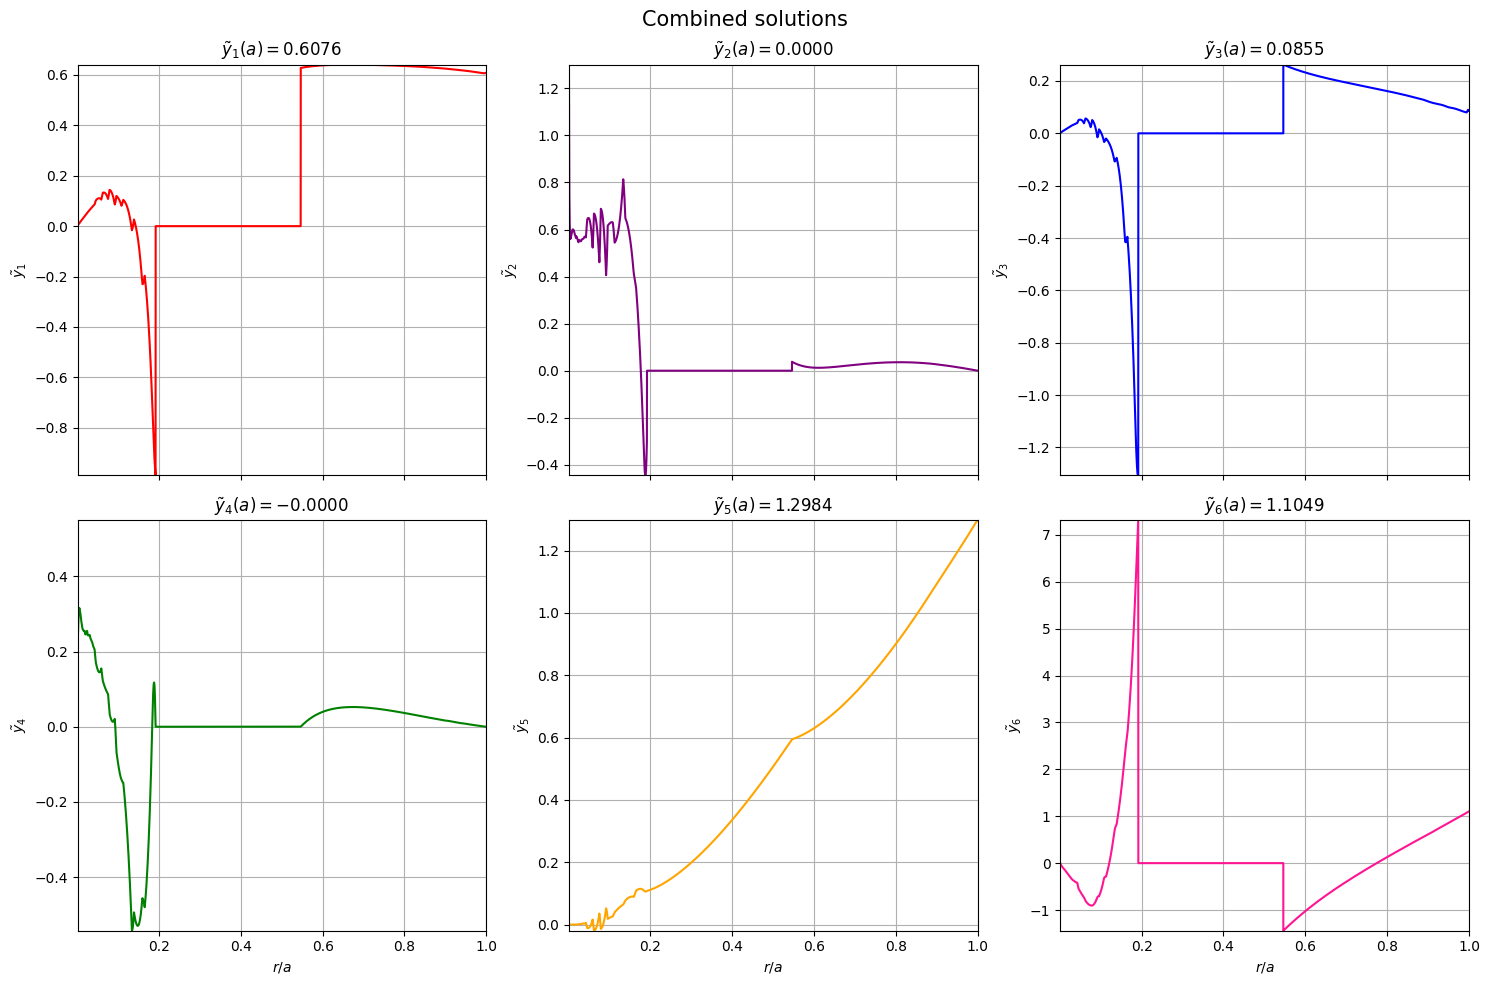

In [75]:
if ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024')):
	
	fig, axs = plt.subplots(2,3,figsize=(15,10), sharex=True)

	#y_1
	y1_sol = y_comb_solution[0]
	ax1 = axs[0,0]
	ax1.plot(rs_ad, y1_sol, color='red', ms=5)
	ax1.set(ylabel=r'$\tilde{y}_1$')#, xlabel=r'$r/a$')
	ax1.set_title(r'$\tilde{y}_1(a) = %.4f$' %y1_sol[-1])
	ax1.grid()
	ax1.margins(0)

	#y_2
	y2_sol = y_comb_solution[1]
	ax2 = axs[0,1]
	ax2.plot(rs_ad, y2_sol, color='purple', ms=5)
	ax2.set(ylabel=r'$\tilde{y}_2$')#, xlabel=r'$r/a$')
	ax2.set_title(r'$\tilde{y}_2(a) = %.4f$' %y2_sol[-1])
	ax2.grid()
	ax2.margins(0)

	#y_3
	y3_sol = y_comb_solution[2]
	ax3 = axs[0,2]
	ax3.plot(rs_ad, y3_sol, color='blue', ms=5)
	ax3.set(ylabel=r'$\tilde{y}_3$')#, xlabel=r'$r/a$')
	ax3.set_title(r'$\tilde{y}_3(a) = %.4f$' %y3_sol[-1])
	ax3.grid()
	ax3.margins(0)

	#y_4
	y4_sol = y_comb_solution[3]
	ax4 = axs[1,0]
	ax4.plot(rs_ad, y4_sol, color='green', ms=5)
	ax4.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_4$')
	ax4.set_title(r'$\tilde{y}_4(a) = %.4f$' %y4_sol[-1])
	ax4.grid()
	ax4.margins(0)

	#y_5
	y5_sol = y_comb_solution[4]
	ax5 = axs[1,1]
	ax5.plot(rs_ad, y5_sol, color='orange', ms=5)
	ax5.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_5$')
	ax5.set_title(r'$\tilde{y}_5(a) = %.4f$' %y5_sol[-1])
	ax5.grid()
	ax5.margins(0)

	#y_6
	y6_sol = y_comb_solution[5]
	ax6 = axs[1,2]
	ax6.plot(rs_ad, y6_sol, color='deeppink', ms=5)
	ax6.set(xlabel=r'$r/a$', ylabel=r'$\tilde{y}_6$')
	ax6.set_title(r'$\tilde{y}_6(a) = %.4f$' %y6_sol[-1])
	ax6.grid()
	ax6.margins(0)

	fig.suptitle('Combined solutions', fontsize=15)
	fig.tight_layout();

## Love Number results

In [76]:
#Plot Love Number solutions
if (equations_set_mantle == 'XuSun2003') or ((equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024modified')):
	fig, axs = plt.subplots(1,3,figsize=(15,5))

	#h_n
	h_n = y1_sol/rs_ad**n
	axh = axs[0]
	axh.plot(rs_ad, h_n, color='black', ms=5)
	axh.set(xlabel=r'$r/a$', ylabel=r'$H_n(r)$')
	axh.set_title(r'$h_n = %.2f$' % (h_n[-1]))
	axh.grid()
	axh.margins(0)

	#l_n
	l_n = y3_sol/rs_ad**n
	axl = axs[1]
	axl.plot(rs_ad, l_n, color='gray', ms=5)
	axl.set(xlabel=r'$r/a$', ylabel=r'$L_n(r)$')
	axl.set_title(r'$l_n = %.2f$' % (l_n[-1]))
	axl.grid()
	axl.margins(0)

	#k_n
	k_n = y5_sol/rs_ad**n
	axk = axs[2]
	axk.plot(rs_ad, k_n, color='brown', ms=5)
	axk.set(xlabel=r'$r/a$', ylabel=r'$K_n(r)$')
	axk.set_title(r'$k_n = %.2f$' % (k_n[-1]))
	axk.grid()
	axk.margins(0)

	#fig.suptitle('Independent solutions', fontsize=15)
	fig.tight_layout();

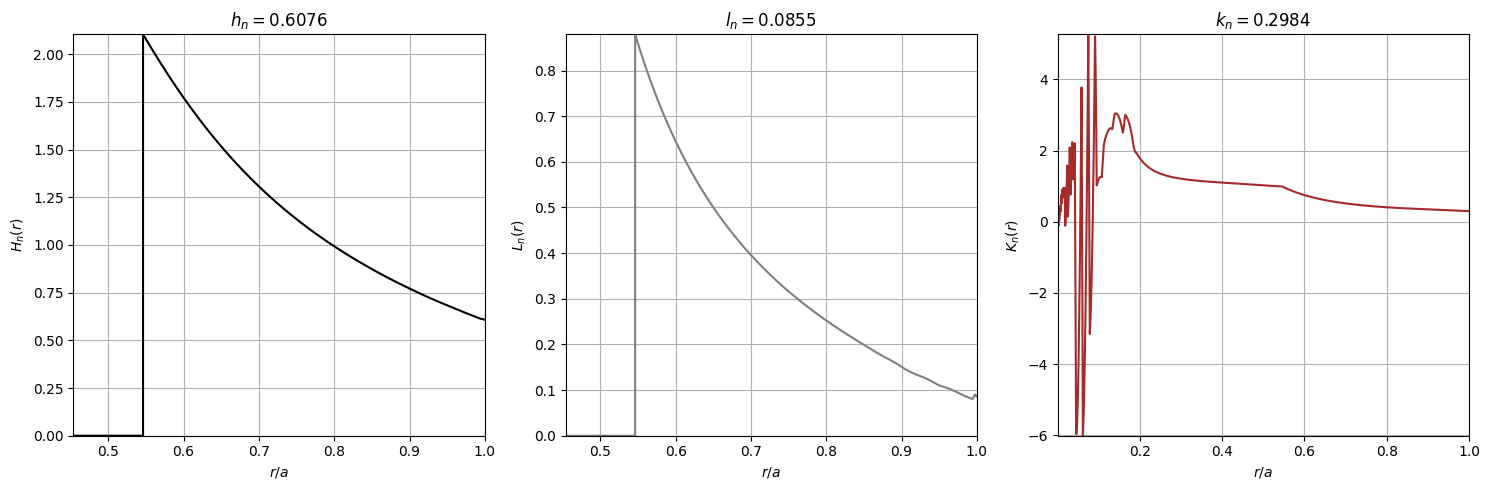

In [77]:
#Plot Love Number solutions
if (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):
	fig, axs = plt.subplots(1,3,figsize=(15,5))

	#H_n
	H_n = y1_sol/rs_ad**n
	axh = axs[0]
	axh.plot(rs_ad[nsteps_mantle:], H_n[nsteps_mantle:], color='black', ms=5)
	axh.set(xlabel=r'$r/a$', ylabel=r'$H_n(r)$')
	axh.set_title(r'$h_n = %.4f$' % (H_n[-1]))
	axh.grid()
	axh.margins(0)

	#L_n
	L_n = y3_sol/rs_ad**n
	axl = axs[1]
	axl.plot(rs_ad[nsteps_mantle:], L_n[nsteps_mantle:], color='gray', ms=5)
	axl.set(xlabel=r'$r/a$', ylabel=r'$L_n(r)$')
	axl.set_title(r'$l_n = %.4f$' % (L_n[-1]))
	axl.grid()
	axl.margins(0)

	#K_n
	K_n = y5_sol/rs_ad**n -1
	axk = axs[2]
	axk.plot(rs_ad, K_n, color='brown', ms=5)
	axk.set(xlabel=r'$r/a$', ylabel=r'$K_n(r)$')
	axk.set_title(r'$k_n = %.4f$' % (K_n[-1]))
	axk.grid()
	axk.margins(0)

	#fig.suptitle('Independent solutions', fontsize=15)
	fig.tight_layout();

In [78]:
if (equations_set_mantle == 'AmorinGudkova2024') & (equations_set_outer == 'AmorinGudkova2024'):
    
	h_n = y_comb_solution[0,-1]
	l_n = y_comb_solution[2,-1]
	k_n = y_comb_solution[4,-1] - 1

	#Gravimetric factor
	delta_n = 1 + 2*h_n/n - (n+1)*k_n/n

	print(f'Love Numbers for n={n} and f={f_day} cycles/day:')
	print(f'h_n = {h_n:.4f}')
	print(f'l_n = {l_n:.4f}')
	print(f'k_n = {k_n:.4f}')
	print(f'Gravimetric factor delta_n = {delta_n:.4f}')

Love Numbers for n=2 and f=1.935022 cycles/day:
h_n = 0.6076
l_n = 0.0855
k_n = 0.2984
Gravimetric factor delta_n = 1.1600


In [84]:
#Comparison with AmorinGudkova2024 and XuSun2003 results for n=2 and M2 tide
h_n_reference = np.array([0.60496, 0.605630])
l_n_reference = np.array([0.08399, 0.084042])
k_n_reference = np.array([0.29872, 0.299365])
delta_n_reference = 1 + 2*h_n_reference/n - (n+1)*k_n_reference/n

#Differences
error_h_n = h_n - h_n_reference
error_l_n = l_n - l_n_reference
error_k_n = k_n - k_n_reference
error_delta_n = delta_n - delta_n_reference

rel_error_h_n = error_h_n / h_n_reference
rel_error_l_n = error_l_n / l_n_reference
rel_error_k_n = error_k_n / k_n_reference
rel_error_delta_n = error_delta_n / delta_n_reference

print('Differences with reference values:')
print(f'Delta h_n: {abs(error_h_n[0]):.4f} ({100*abs(rel_error_h_n[0]):.4f}%) (AmorinGudkova2024), {abs(error_h_n[1]):.4f} ({100*abs(rel_error_h_n[1]):.4f}%) (XuSun2003)')
print(f'Delta l_n: {abs(error_l_n[0]):.4f} ({100*abs(rel_error_l_n[0]):.4f}%) (AmorinGudkova2024), {abs(error_l_n[1]):.4f} ({100*abs(rel_error_l_n[1]):.4f}%) (XuSun2003)')
print(f'Delta k_n: {abs(error_k_n[0]):.4f} ({100*abs(rel_error_k_n[0]):.4f}%) (AmorinGudkova2024), {abs(error_k_n[1]):.4f} ({100*abs(rel_error_k_n[1]):.4f}%) (XuSun2003)')
print(f'Delta delta_n: {abs(error_delta_n[0]):.4f} ({100*abs(rel_error_delta_n[0]):.4f}%) (AmorinGudkova2024), {abs(error_delta_n[1]):.4f} ({100*abs(rel_error_delta_n[1]):.4f}%) (XuSun2003)')

Differences with reference values:
Delta h_n: 0.0026 (0.4356%) (AmorinGudkova2024), 0.0020 (0.3245%) (XuSun2003)
Delta l_n: 0.0015 (1.7499%) (AmorinGudkova2024), 0.0014 (1.6869%) (XuSun2003)
Delta k_n: 0.0003 (0.1160%) (AmorinGudkova2024), 0.0010 (0.3312%) (XuSun2003)
Delta delta_n: 0.0032 (0.2727%) (AmorinGudkova2024), 0.0035 (0.2985%) (XuSun2003)


---
**Copyright**: 2026, Deivy Mercado, Jorge I. Zuluaga, Gloria Moncayo.